# Lab 7- Data Analysis

In this lab, you download and begin to look at a particle physics dataset. You must download the dataset by March 17th. Exercises 1-4 are to be completed by March 21th. The remaider of the lab is due March 29th. Before leaving lab today, I suggest everyone downloads the dataset.

## Exercise 1: Reading

### HiggsML
In 2014, some of my colleagues from the ATLAS experiment put together a Higgs Machine Learning Challenge, which was hosted on [Kaggle](https://www.kaggle.com). Please read sections 1 and 3 (skip/skim 2) of [The HiggsML Technical Documentation](https://higgsml.lal.in2p3.fr/files/2014/04/documentation_v1.8.pdf). 

Kaggle is a platform for data science competitions, with cash awards for winners. Kaggle currently hosts over 50,000 public datasets and associated competitions. Later in the course we will look at a variety of problems hosted on Kaggle and similar platforms. 

### SUSY Dataset

For the next few labs we will use datasets used in the [first paper on Deep Learning in High Energy physics](https://arxiv.org/pdf/1402.4735.pdf). Please read up to the "Deep Learning" section (end of page 5). This paper demonstrates that Deep Neural Networks can learn from raw data the features that are typically used by physicists for searches for exotics particles. The authors provide the data they used for this paper. They considered two benchmark scenarios: Higgs and SUSY.

## Exercise 2: Download SUSY Dataset

The information about the dataset can be found at the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). We'll start with the [SUSY Dataset](https://archive.ics.uci.edu/ml/datasets/SUSY). 

### Download
In a terminal, download the data directly from the source and then decompress it. For example:

* To download:
    * On Mac OS: 
    `curl http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz > SUSY.csv.gz`

    * In linux:
    `wget http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz`

* To uncompress:
`gunzip SUSY.csv.gz`

In [1]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz

--2025-04-19 12:45:09--  http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘SUSY.csv.gz’

SUSY.csv.gz             [                <=> ] 879.65M  7.01MB/s    in 80s     

2025-04-19 12:46:26 (11.0 MB/s) - ‘SUSY.csv.gz’ saved [922377711]



In [2]:
!rm SUSY.csv

rm: cannot remove 'SUSY.csv': No such file or directory


In [4]:
!gunzip SUSY.csv.gz

gzip: SUSY.csv.gz: No such file or directory


In [5]:
ls -lh

total 2.3G
-rw-rw-r-- 1 manyavikal17 manyavikal17 391K Apr 19 12:44 Lab.7.ipynb
-rw-rw-r-- 1 manyavikal17 manyavikal17 5.9M Mar 21 15:01 Lab.7.pdf
-rw-rw-r-- 1 manyavikal17 manyavikal17 390K Apr 19 12:46 Lab.7.solutions.ipynb
-rw-rw-r-- 1 manyavikal17 manyavikal17 2.3G Apr 19 12:46 SUSY.csv


The data is provided as a comma separated file.

In [6]:
filename="SUSY.csv"
# print out the first 5 lines using unix head command
!head -5  "SUSY.csv"

0.000000000000000000e+00,9.728614687919616699e-01,6.538545489311218262e-01,1.176224589347839355e+00,1.157156467437744141e+00,-1.739873170852661133e+00,-8.743090629577636719e-01,5.677649974822998047e-01,-1.750000417232513428e-01,8.100607395172119141e-01,-2.525521218776702881e-01,1.921887040138244629e+00,8.896374106407165527e-01,4.107718467712402344e-01,1.145620822906494141e+00,1.932632088661193848e+00,9.944640994071960449e-01,1.367815494537353516e+00,4.071449860930442810e-02
1.000000000000000000e+00,1.667973041534423828e+00,6.419061869382858276e-02,-1.225171446800231934e+00,5.061022043228149414e-01,-3.389389812946319580e-01,1.672542810440063477e+00,3.475464344024658203e+00,-1.219136357307434082e+00,1.295456290245056152e-02,3.775173664093017578e+00,1.045977115631103516e+00,5.680512785911560059e-01,4.819284379482269287e-01,0.000000000000000000e+00,4.484102725982666016e-01,2.053557634353637695e-01,1.321893453598022461e+00,3.775840103626251221e-01
1.000000000000000000e+00,4.4483992457389831

## Reducing the dataset

This is a rather large dataset. If you have trouble loading it, we can easily make a new file with less data.

Here we look at the size of the data

In [7]:
!ls -lh

total 2.3G
-rw-rw-r-- 1 manyavikal17 manyavikal17 391K Apr 19 12:44 Lab.7.ipynb
-rw-rw-r-- 1 manyavikal17 manyavikal17 5.9M Mar 21 15:01 Lab.7.pdf
-rw-rw-r-- 1 manyavikal17 manyavikal17 390K Apr 19 12:46 Lab.7.solutions.ipynb
-rw-rw-r-- 1 manyavikal17 manyavikal17 2.3G Apr 19 12:46 SUSY.csv


We see that we have 5 million datapoints.

In [8]:
!wc -l SUSY.csv

5000000 SUSY.csv


We create a new file of the first half million. This is sufficient for our needs in this lab:

In [9]:
!head -500000 SUSY.csv > SUSY-small.csv

In [10]:
ls -lh

total 2.5G
-rw-rw-r-- 1 manyavikal17 manyavikal17 391K Apr 19 12:44 Lab.7.ipynb
-rw-rw-r-- 1 manyavikal17 manyavikal17 5.9M Mar 21 15:01 Lab.7.pdf
-rw-rw-r-- 1 manyavikal17 manyavikal17 390K Apr 19 12:46 Lab.7.solutions.ipynb
-rw-rw-r-- 1 manyavikal17 manyavikal17 228M Apr 19 12:48 SUSY-small.csv
-rw-rw-r-- 1 manyavikal17 manyavikal17 2.3G Apr 19 12:46 SUSY.csv


In [11]:
! wc -l SUSY-small.csv

500000 SUSY-small.csv


Use this file for the rest of the lab to make this run faster.

### First Look

Each row represents a LHC collision event. Each column contains some observable from that event. The variable names are ([based on documentation](https://archive.ics.uci.edu/ml/datasets/SUSY)):

In [1]:
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]

Some of these variables represent the "raw" kinematics of the observed final state particles, while others are "features" that are derived from these raw quantities:

In [3]:
RawNames=["l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi"]
FeatureNames=list(set(VarNames[1:]).difference(RawNames))

In [4]:
RawNames

['l_1_pT',
 'l_1_eta',
 'l_1_phi',
 'l_2_pT',
 'l_2_eta',
 'l_2_phi',
 'MET',
 'MET_phi']

In [5]:
FeatureNames

['axial_MET',
 'M_R',
 'M_TR_2',
 'dPhi_r_b',
 'MET_rel',
 'R',
 'cos_theta_r1',
 'MT2',
 'S_R',
 'M_Delta_R']

We will use pandas to read in the file, and matplotlib to make plots. The following ensures pandas is installed and sets everything up:

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Now we can read the data into a pandas dataframe:

In [7]:
filename = "SUSY.csv"
df = pd.read_csv(filename, dtype='float64', names=VarNames)

You can see the data in Jupyter by just evaluateing the dataframe:

In [9]:
df

signal    l_1_pT   l_1_eta   l_1_phi    l_2_pT   l_2_eta   l_2_phi  \
0           0.0  0.972861  0.653855  1.176225  1.157156 -1.739873 -0.874309   
1           1.0  1.667973  0.064191 -1.225171  0.506102 -0.338939  1.672543   
2           1.0  0.444840 -0.134298 -0.709972  0.451719 -1.613871 -0.768661   
3           1.0  0.381256 -0.976145  0.693152  0.448959  0.891753 -0.677328   
4           1.0  1.309996 -0.690089 -0.676259  1.589283 -0.693326  0.622907   
...         ...       ...       ...       ...       ...       ...       ...   
4999995     1.0  0.853325 -0.961783 -1.487277  0.678190  0.493580  1.647969   
4999996     0.0  0.951581  0.139370  1.436884  0.880440 -0.351948 -0.740852   
4999997     0.0  0.840389  1.419162 -1.218766  1.195631  1.695645  0.663756   
4999998     1.0  1.784218 -0.833565 -0.560091  0.953342 -0.688969 -1.428233   
4999999     0.0  0.761500  0.680454 -1.186213  1.043521 -0.316755  0.246879   

              MET   MET_phi   MET_rel  axial_MET       M_R    M_TR_2  \
0        0.567765 -0.175000  0.810061  -0.252552  1.921887  0.889637   
1        3.475464 -1.219136  0.012955   3.775174  1.045977  0.568051   
2        1.219918  0.504026  1.831248  -0.431385  0.526283  0.941514   
3        2.033060  1.533041  3.046260  -1.005285  0.569386  1.015211   
4        1.087562 -0.381742  0.589204   1.365479  1.179295  0.968218   
...           ...       ...       ...        ...       ...       ...   
4999995  1.843867  0.276954  1.025105  -1.486535  0.892879  1.684429   
4999996  0.290863 -0.732360  0.001360   0.257738  0.802871  0.545319   
4999997  0.490888 -0.509186  0.704289   0.045744  0.825015  0.723530   
4999998  2.660703 -0.861344  2.116892   2.906151  1.232334  0.952444   
4999999  1.120280  0.998479  1.640881  -0.797688  0.854212  1.121858   

                R       MT2       S_R  M_Delta_R  dPhi_r_b  cos_theta_r1  
0        0.410772  1.145621  1.932632   0.994464  1.367815      0.040714  
1        0.481928  0.000000  0.448410   0.205356  1.321893      0.377584  
2        1.587535  2.024308  0.603498   1.562374  1.135454      0.180910  
3        1.582217  1.551914  0.761215   1.715464  1.492257      0.090719  
4        0.728563  0.000000  1.083158   0.043429  1.154854      0.094859  
...           ...       ...       ...        ...       ...           ...  
4999995  1.674084  3.366298  1.046707   2.646649  1.389226      0.364599  
4999996  0.602730  0.002998  0.748959   0.401166  0.443471      0.239953  
4999997  0.778236  0.752942  0.838953   0.614048  1.210595      0.026692  
4999998  0.685846  0.000000  0.781874   0.676003  1.197807      0.093689  
4999999  1.165438  1.498351  0.931580   1.293524  1.539167      0.187496  

[5000000 rows x 19 columns]

The first column stores the "truth" label of whether an event was signal or not. Pandas makes it easy to create dataframes that store only the signal or background events:

In [8]:
df_sig=df[df.signal==1]
df_bkg=df[df.signal==0]

The following example plots the signal and background distributions of every variable. Note that we use VarNames[1:] to skip the first variable, which was the true label.

l_1_pT


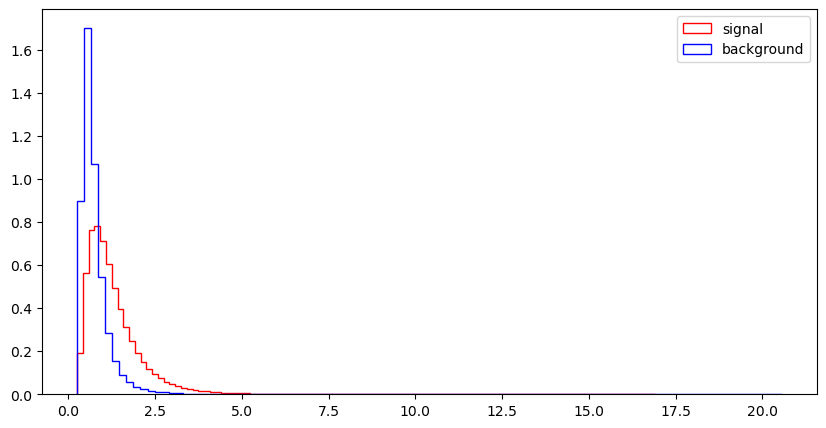

l_1_eta


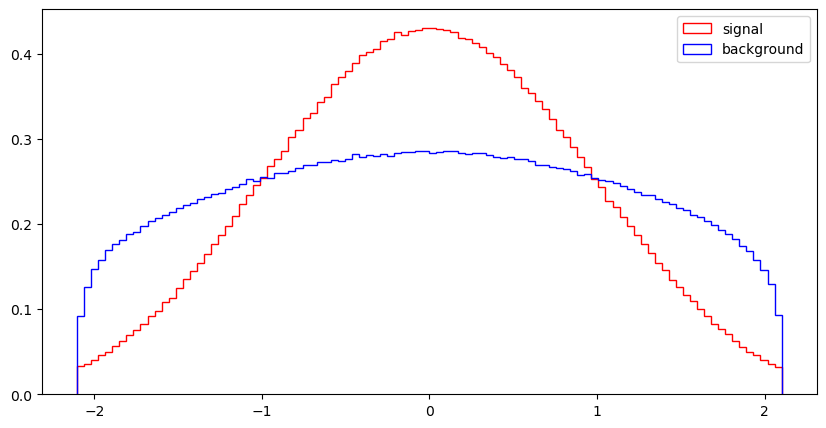

l_1_phi


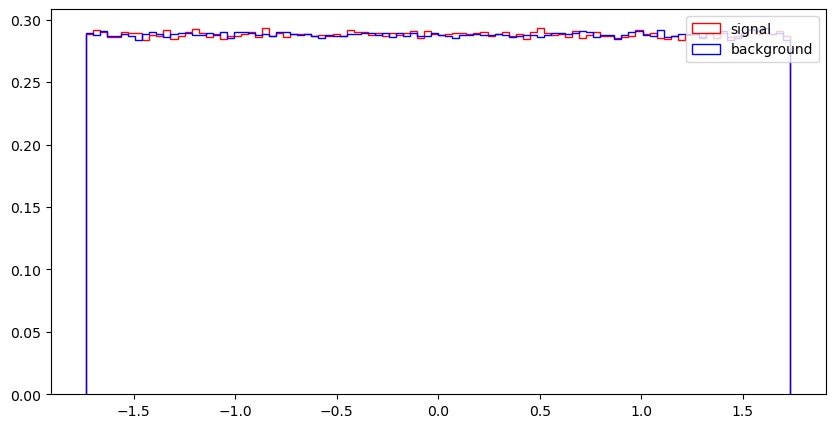

l_2_pT


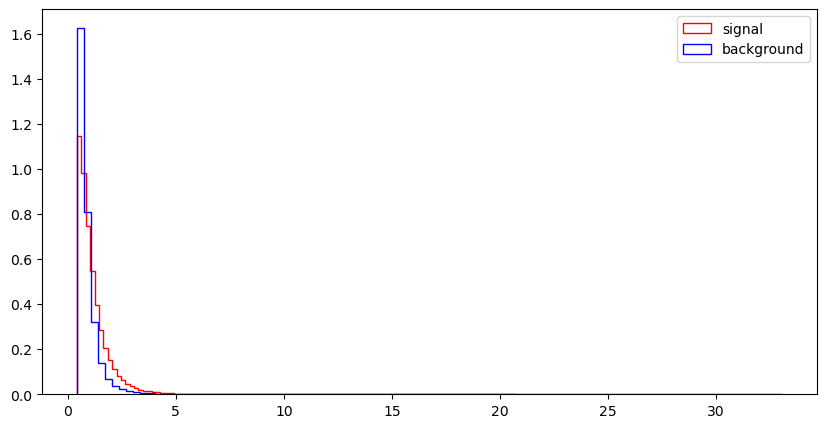

l_2_eta


l_2_phi


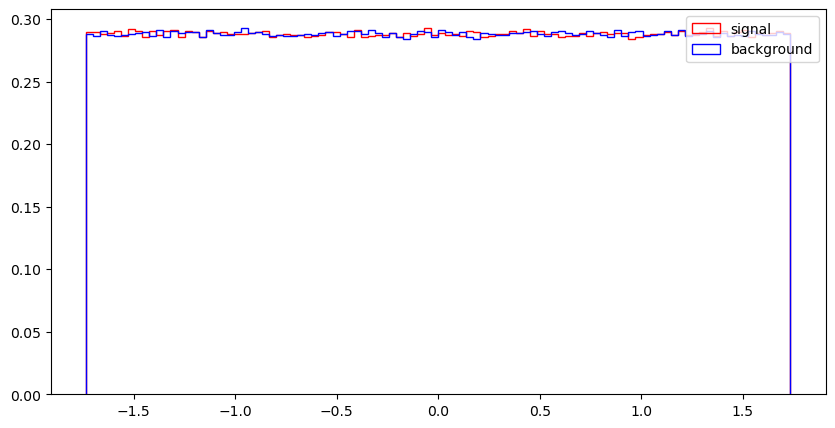

MET


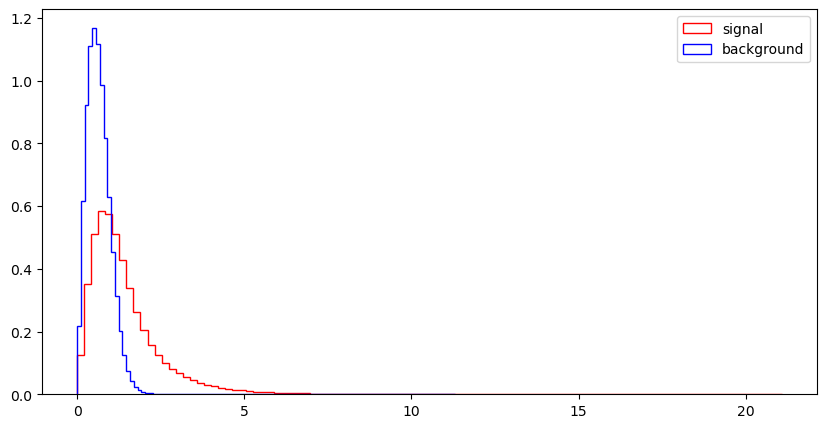

MET_phi


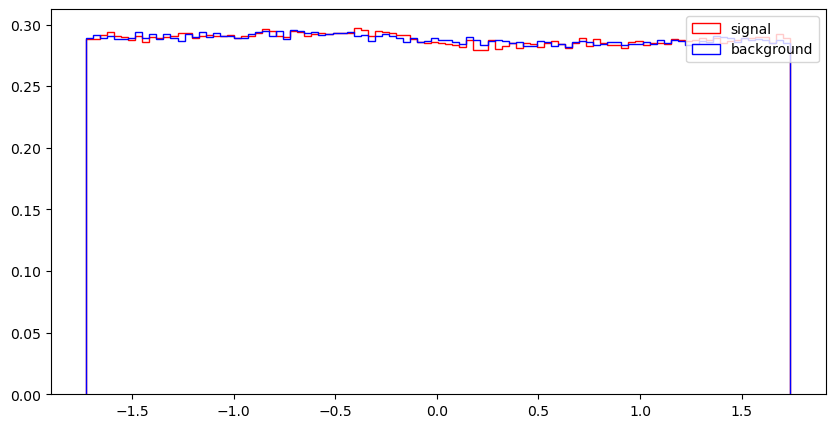

MET_rel


axial_MET


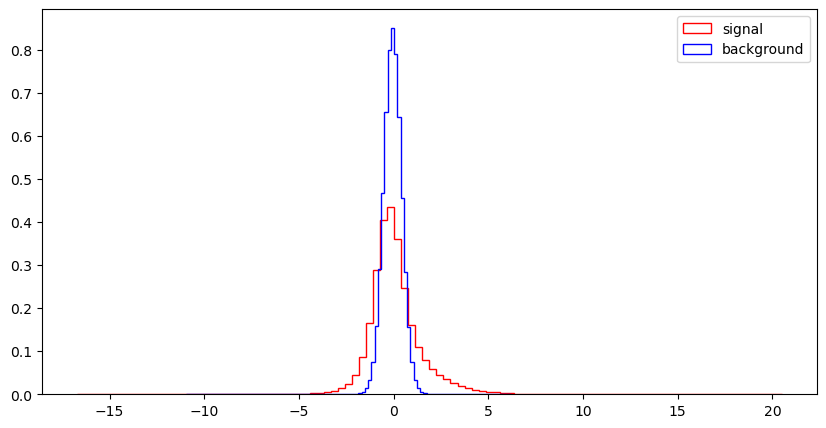

M_R


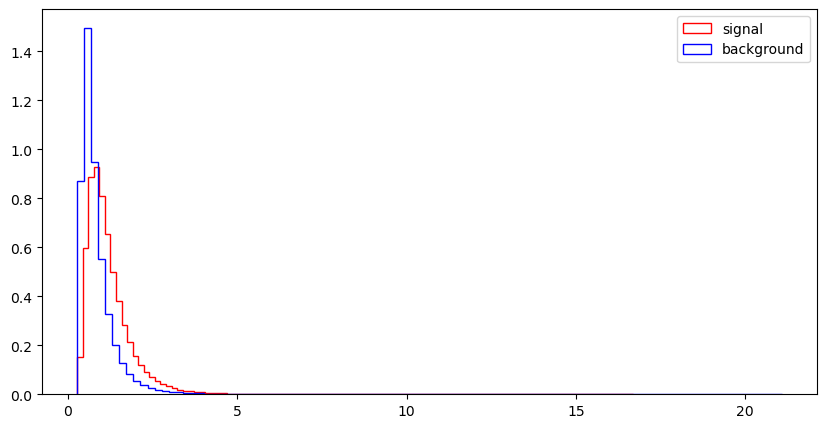

M_TR_2


R


MT2


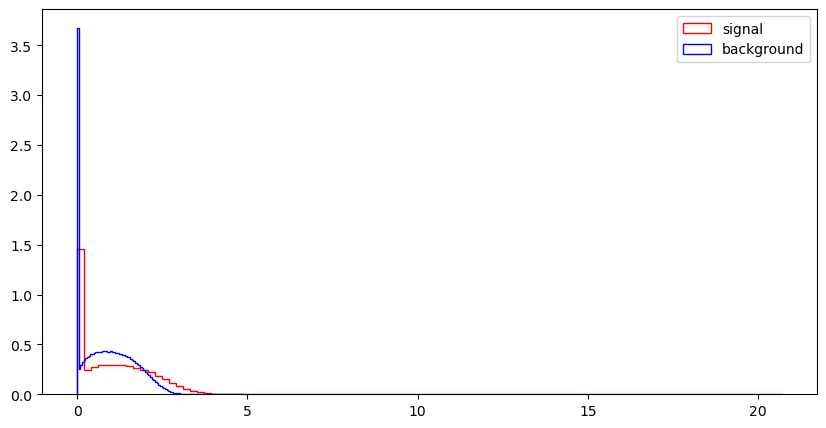

S_R


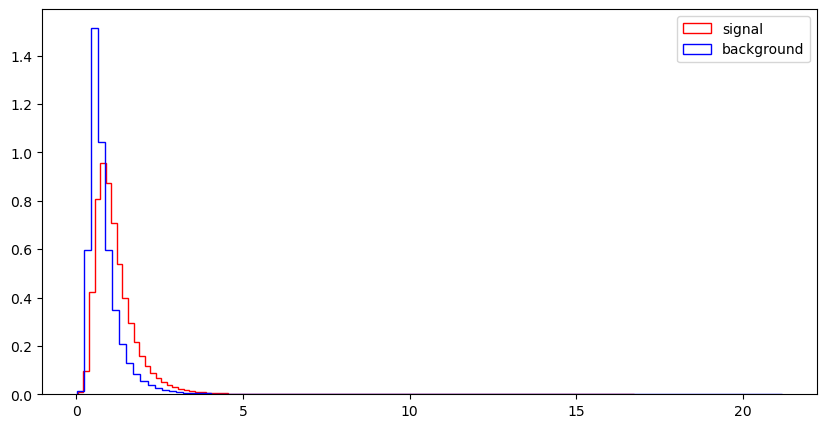

M_Delta_R


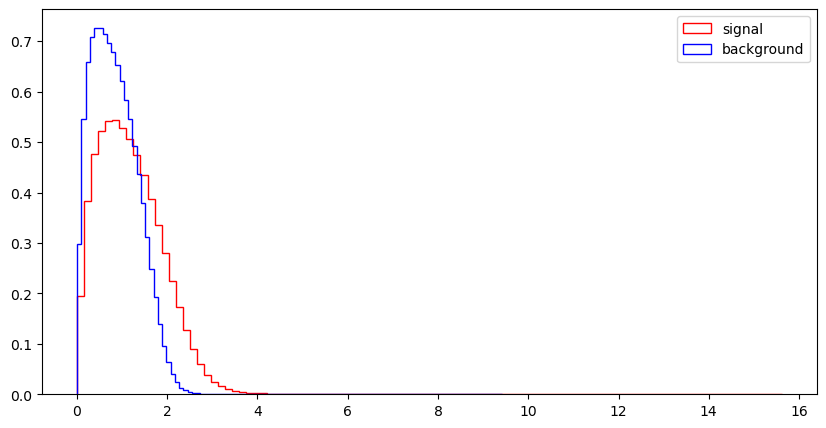

dPhi_r_b


cos_theta_r1


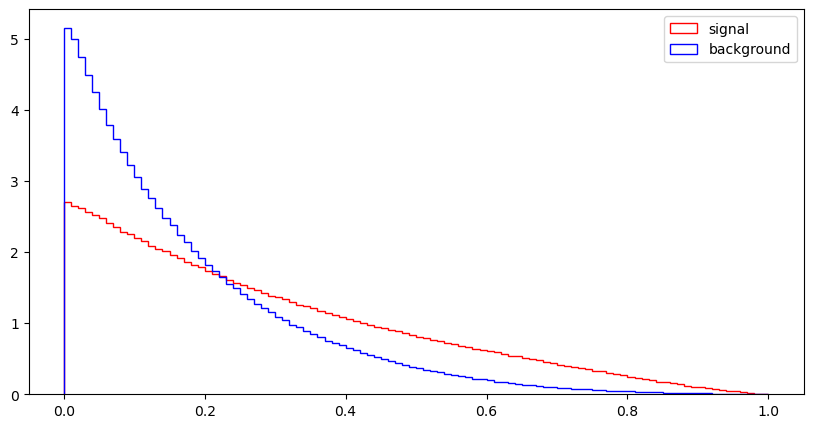

In [9]:
import numpy as np
for var in VarNames[1:]:
    print (var)
    plt.figure(figsize=(10,5))
    plt.hist(np.array(df_sig[var]),bins=100,histtype="step", color="red",label="signal",density=1, stacked=True)
    plt.hist(np.array(df_bkg[var]),bins=100,histtype="step", color="blue", label="background",density=1, stacked=True)
    plt.legend(loc='upper right')
    plt.show()

## Exercise 3: Make nice figures

Now use `matplotlib` to reproduce as closely as you can figures 5 and 6 from the paper. This exercise is intended to get you to familiarize yourself with making nicely formatted `matplotlib` figures with multiple plots. Note that the plots in the paper are actually wrong!

In [9]:
df_sig = df[df.signal == 1]      ### Signal Events
df_bkg = df[df.signal == 0]      ### Background Events

low_level_features = VarNames[1:9]
high_level_features = VarNames[9:]

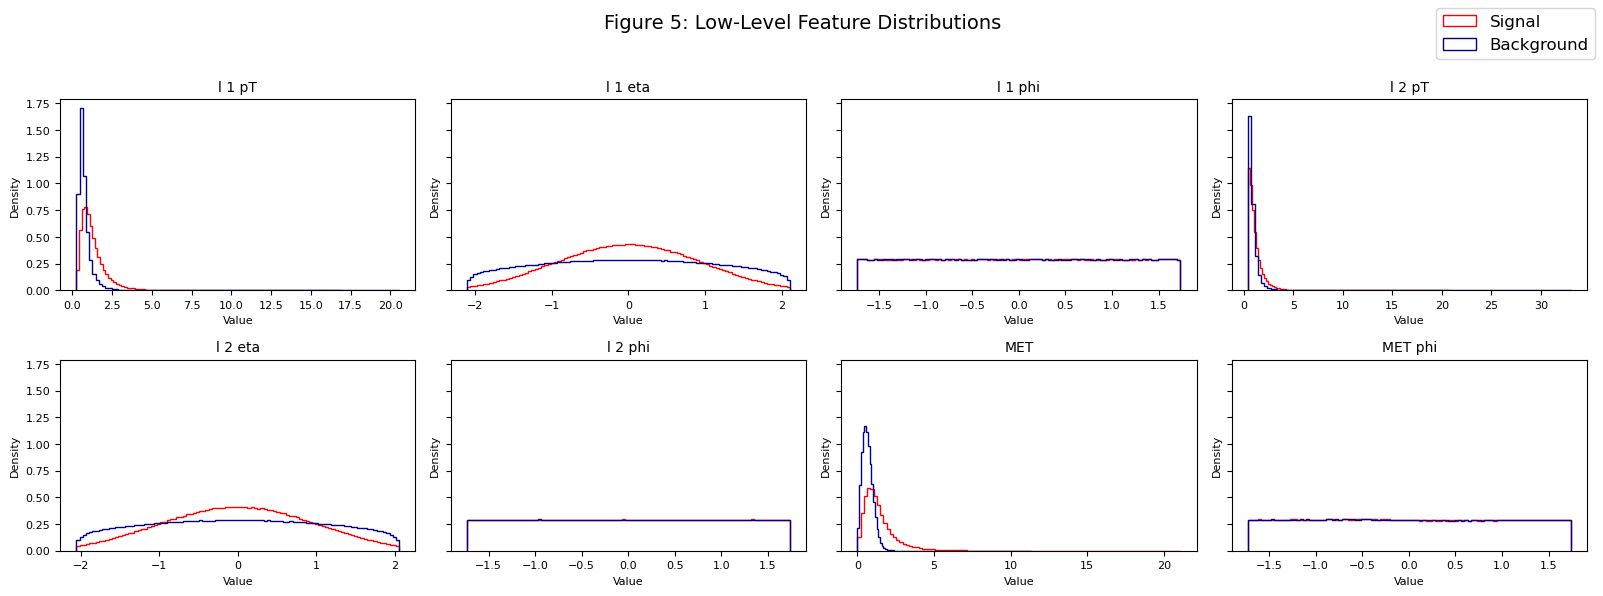

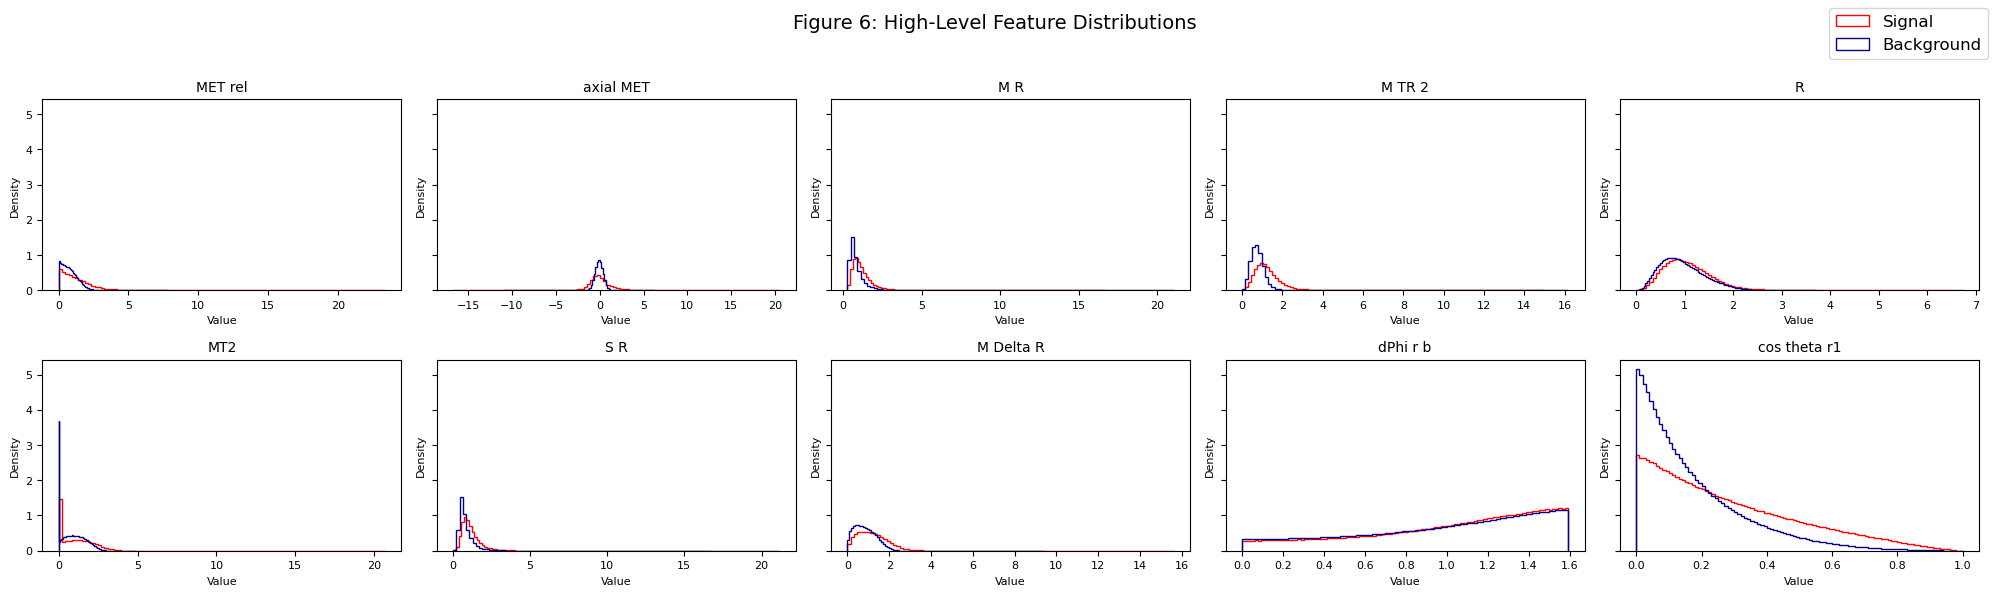

In [22]:
def plot_feature_panels(features, df_sig, df_bkg, ncols, figure_title):
    n = len(features)
    nrows = int(np.ceil(n / ncols))
    fig, axes = plt.subplots(nrows, ncols, figsize=(4 * ncols, 3 * nrows), sharey=True)
    axes = axes.flatten()
    
    for idx, feature in enumerate(features):
        ax = axes[idx]          
        ax.hist(df_sig[feature], bins=100, histtype='step', color='red',   label='Signal', density=True)            ### Plot signal histogram
        ax.hist(df_bkg[feature], bins=100, histtype='step', color='darkblue',  label='Background', density=True)        ### Plot background histogram
        ax.set_title(feature.replace('_', ' '), fontsize=10)
        ax.set_xlabel('Value', fontsize=8)
        ax.set_ylabel('Density', fontsize=8)
        ax.tick_params(labelsize=8)
        
       
    fig.legend(['Signal', 'Background'], loc='upper right', fontsize=12)     ### Adding legend and title
    fig.suptitle(figure_title, fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

plot_feature_panels(low_level_features, df_sig, df_bkg, ncols=4, figure_title='Figure 5: Low-Level Feature Distributions')
plot_feature_panels(high_level_features, df_sig, df_bkg, ncols=5, figure_title='Figure 6: High-Level Feature Distributions')

## Exercise 4: Correlation

### Exercise 4.1

#### Part a
Write a function that creates pair plots and use it to compare variables in the SUSY sample, separately for low and high-level features. Refer to Lecture 13 for details. Do not use `seaborn`.

#### Part b
Making these plots can be slow because creating each plot initiates a full loop over the data. Make at least one modification to your function in part a to speed it up. Can you propose a different method of creating histograms that would speed up making such pair plots?

#### Part c
Which observables appear to be best for separating signal from background?

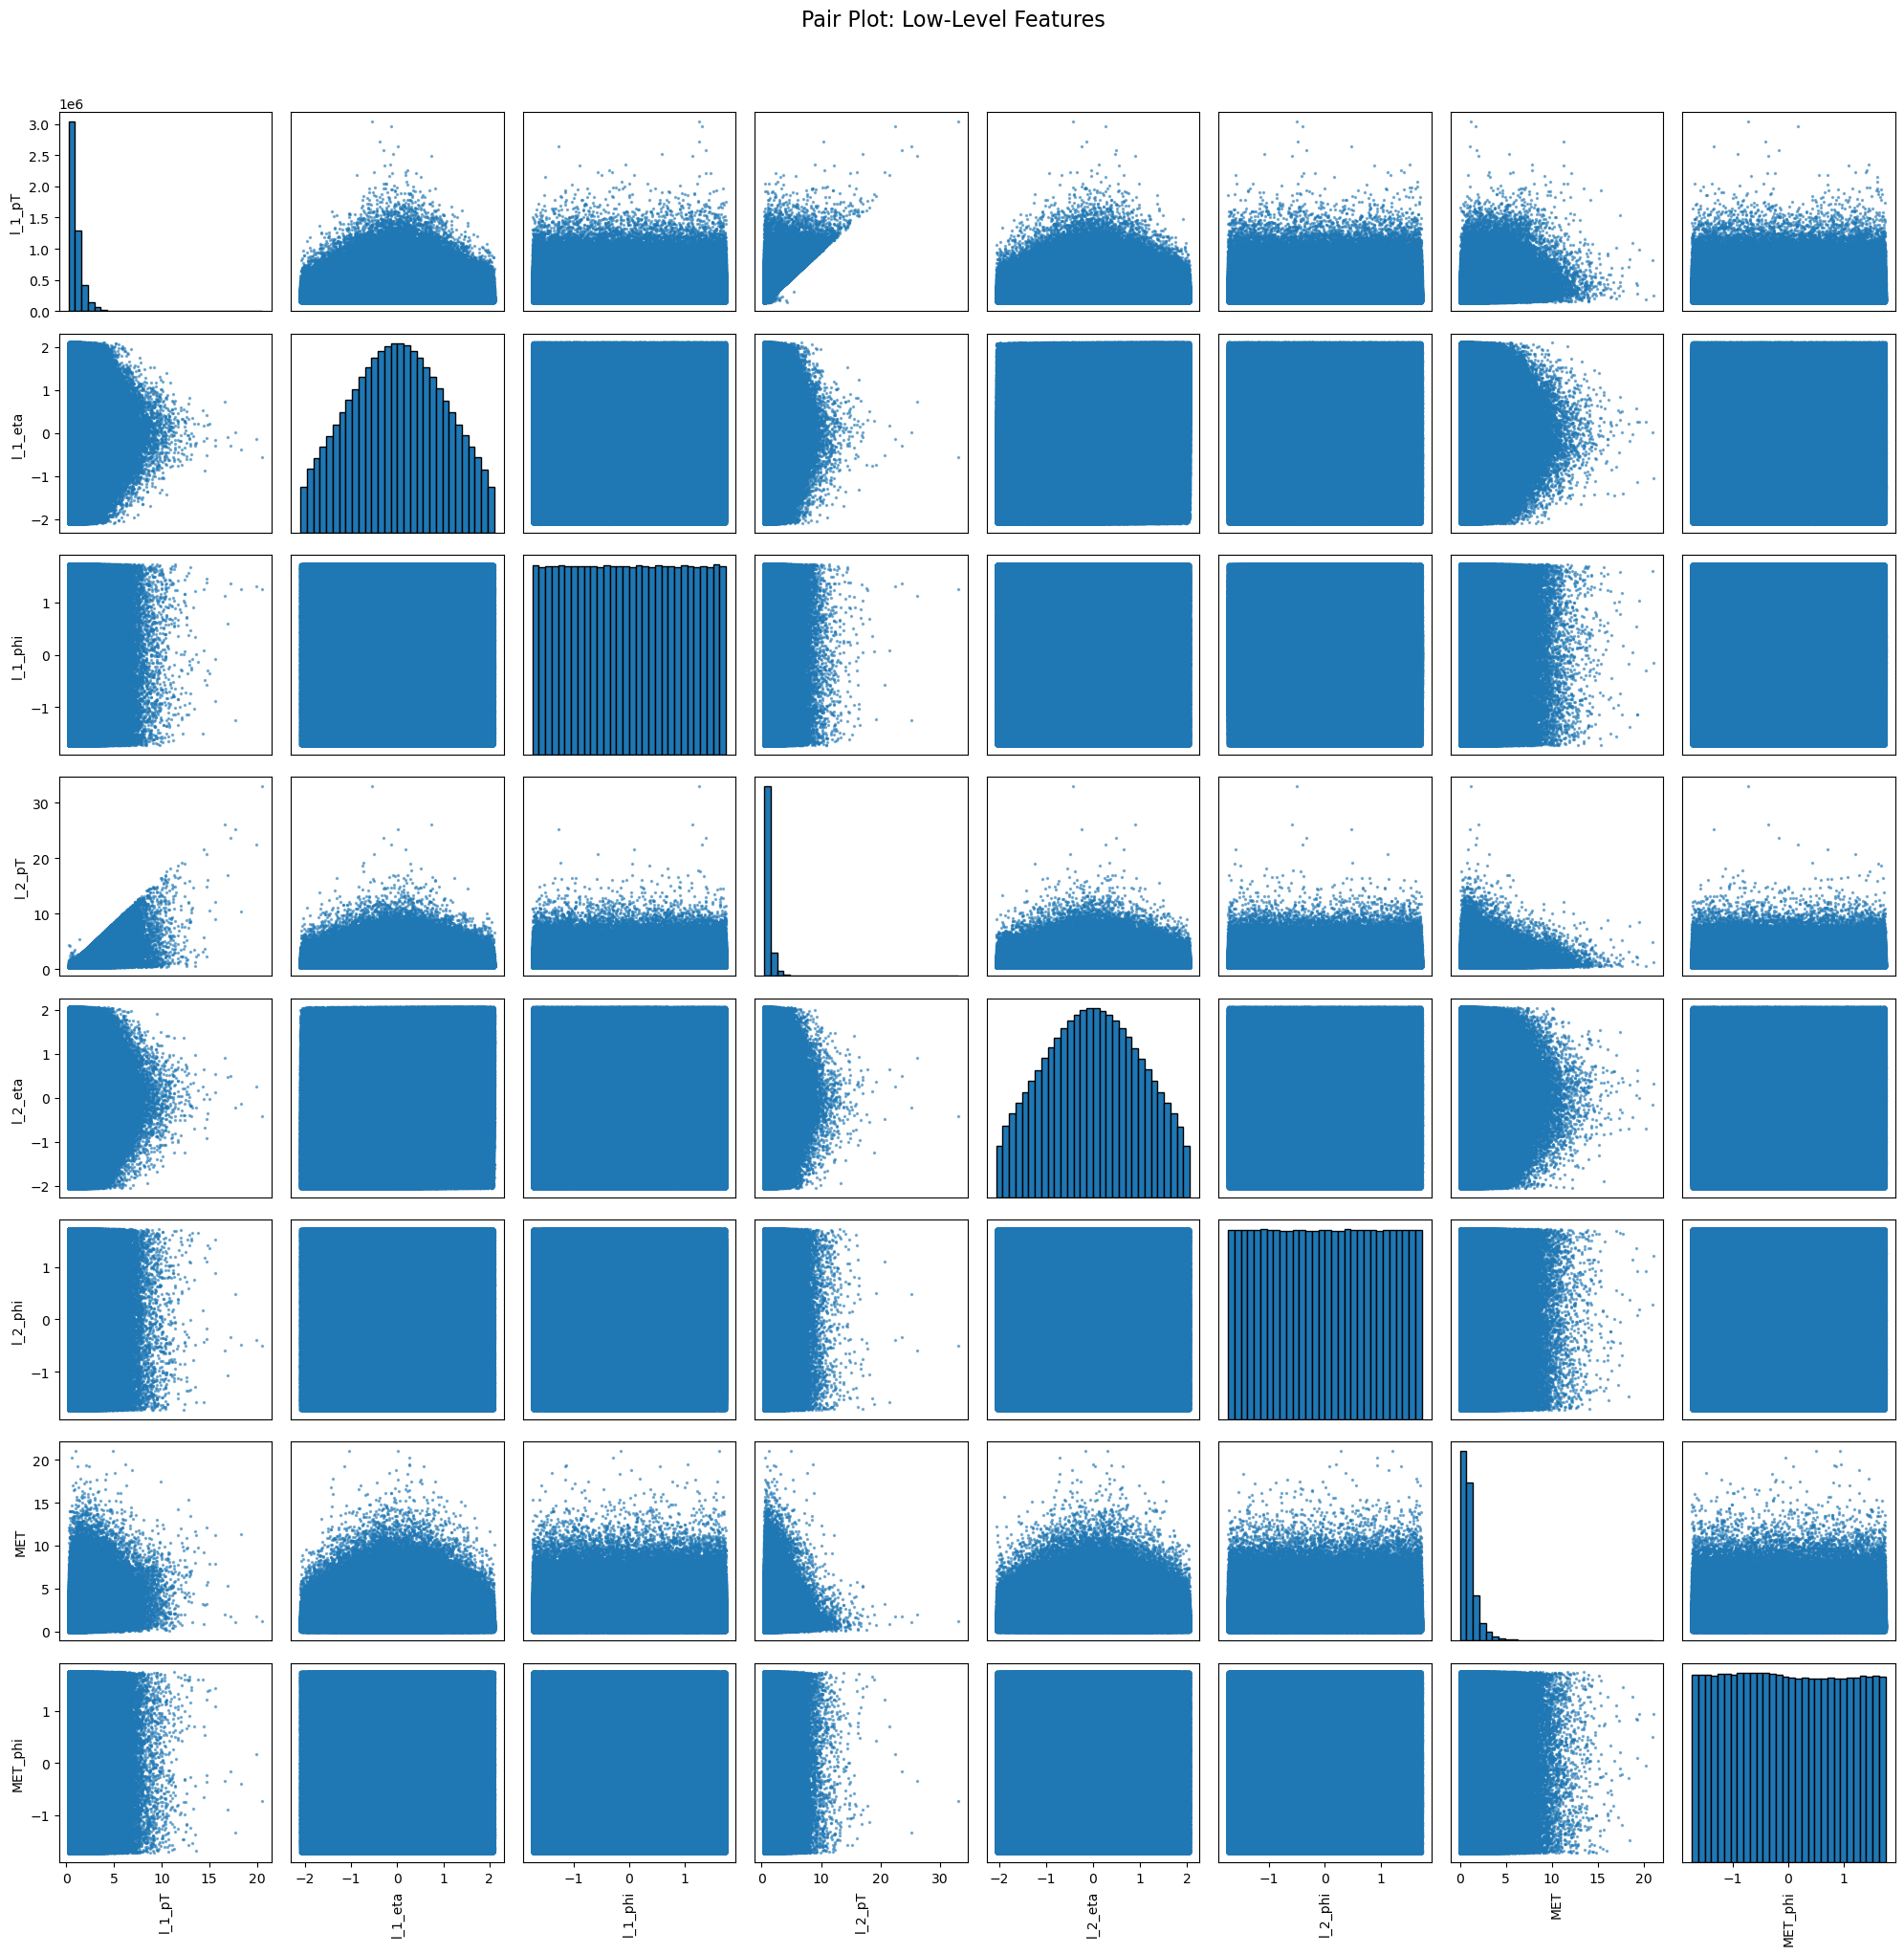

In [ ]:
### Part a

def plot_pair_matrix(df, features, title):
   
    n = len(features)             ### Number of features to compare
       
    fig, axes = plt.subplots(n, n, figsize=(2.5 * n, 2.5 * n))
    
    for i, feat_i in enumerate(features):      ### Looping over all subplot positions
        for j, feat_j in enumerate(features):
            ax = axes[i, j]
            
            if i == j:
                ax.hist(df[feat_i], bins=30, edgecolor='black')
            else:
                ax.scatter(df[feat_j], df[feat_i], s=2, alpha=0.5)
            
            if i < n - 1:
                ax.set_xticks([])
            else:
                ax.set_xlabel(feat_j, rotation=90)
            
            if j > 0:
                ax.set_yticks([])
            else:
                ax.set_ylabel(feat_i)
    
    fig.suptitle(title, fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()

plot_pair_matrix(df, low_level_features, "Pair Plot: Low-Level Features")

plot_pair_matrix(df, high_level_features, "Pair Plot: High-Level Features")

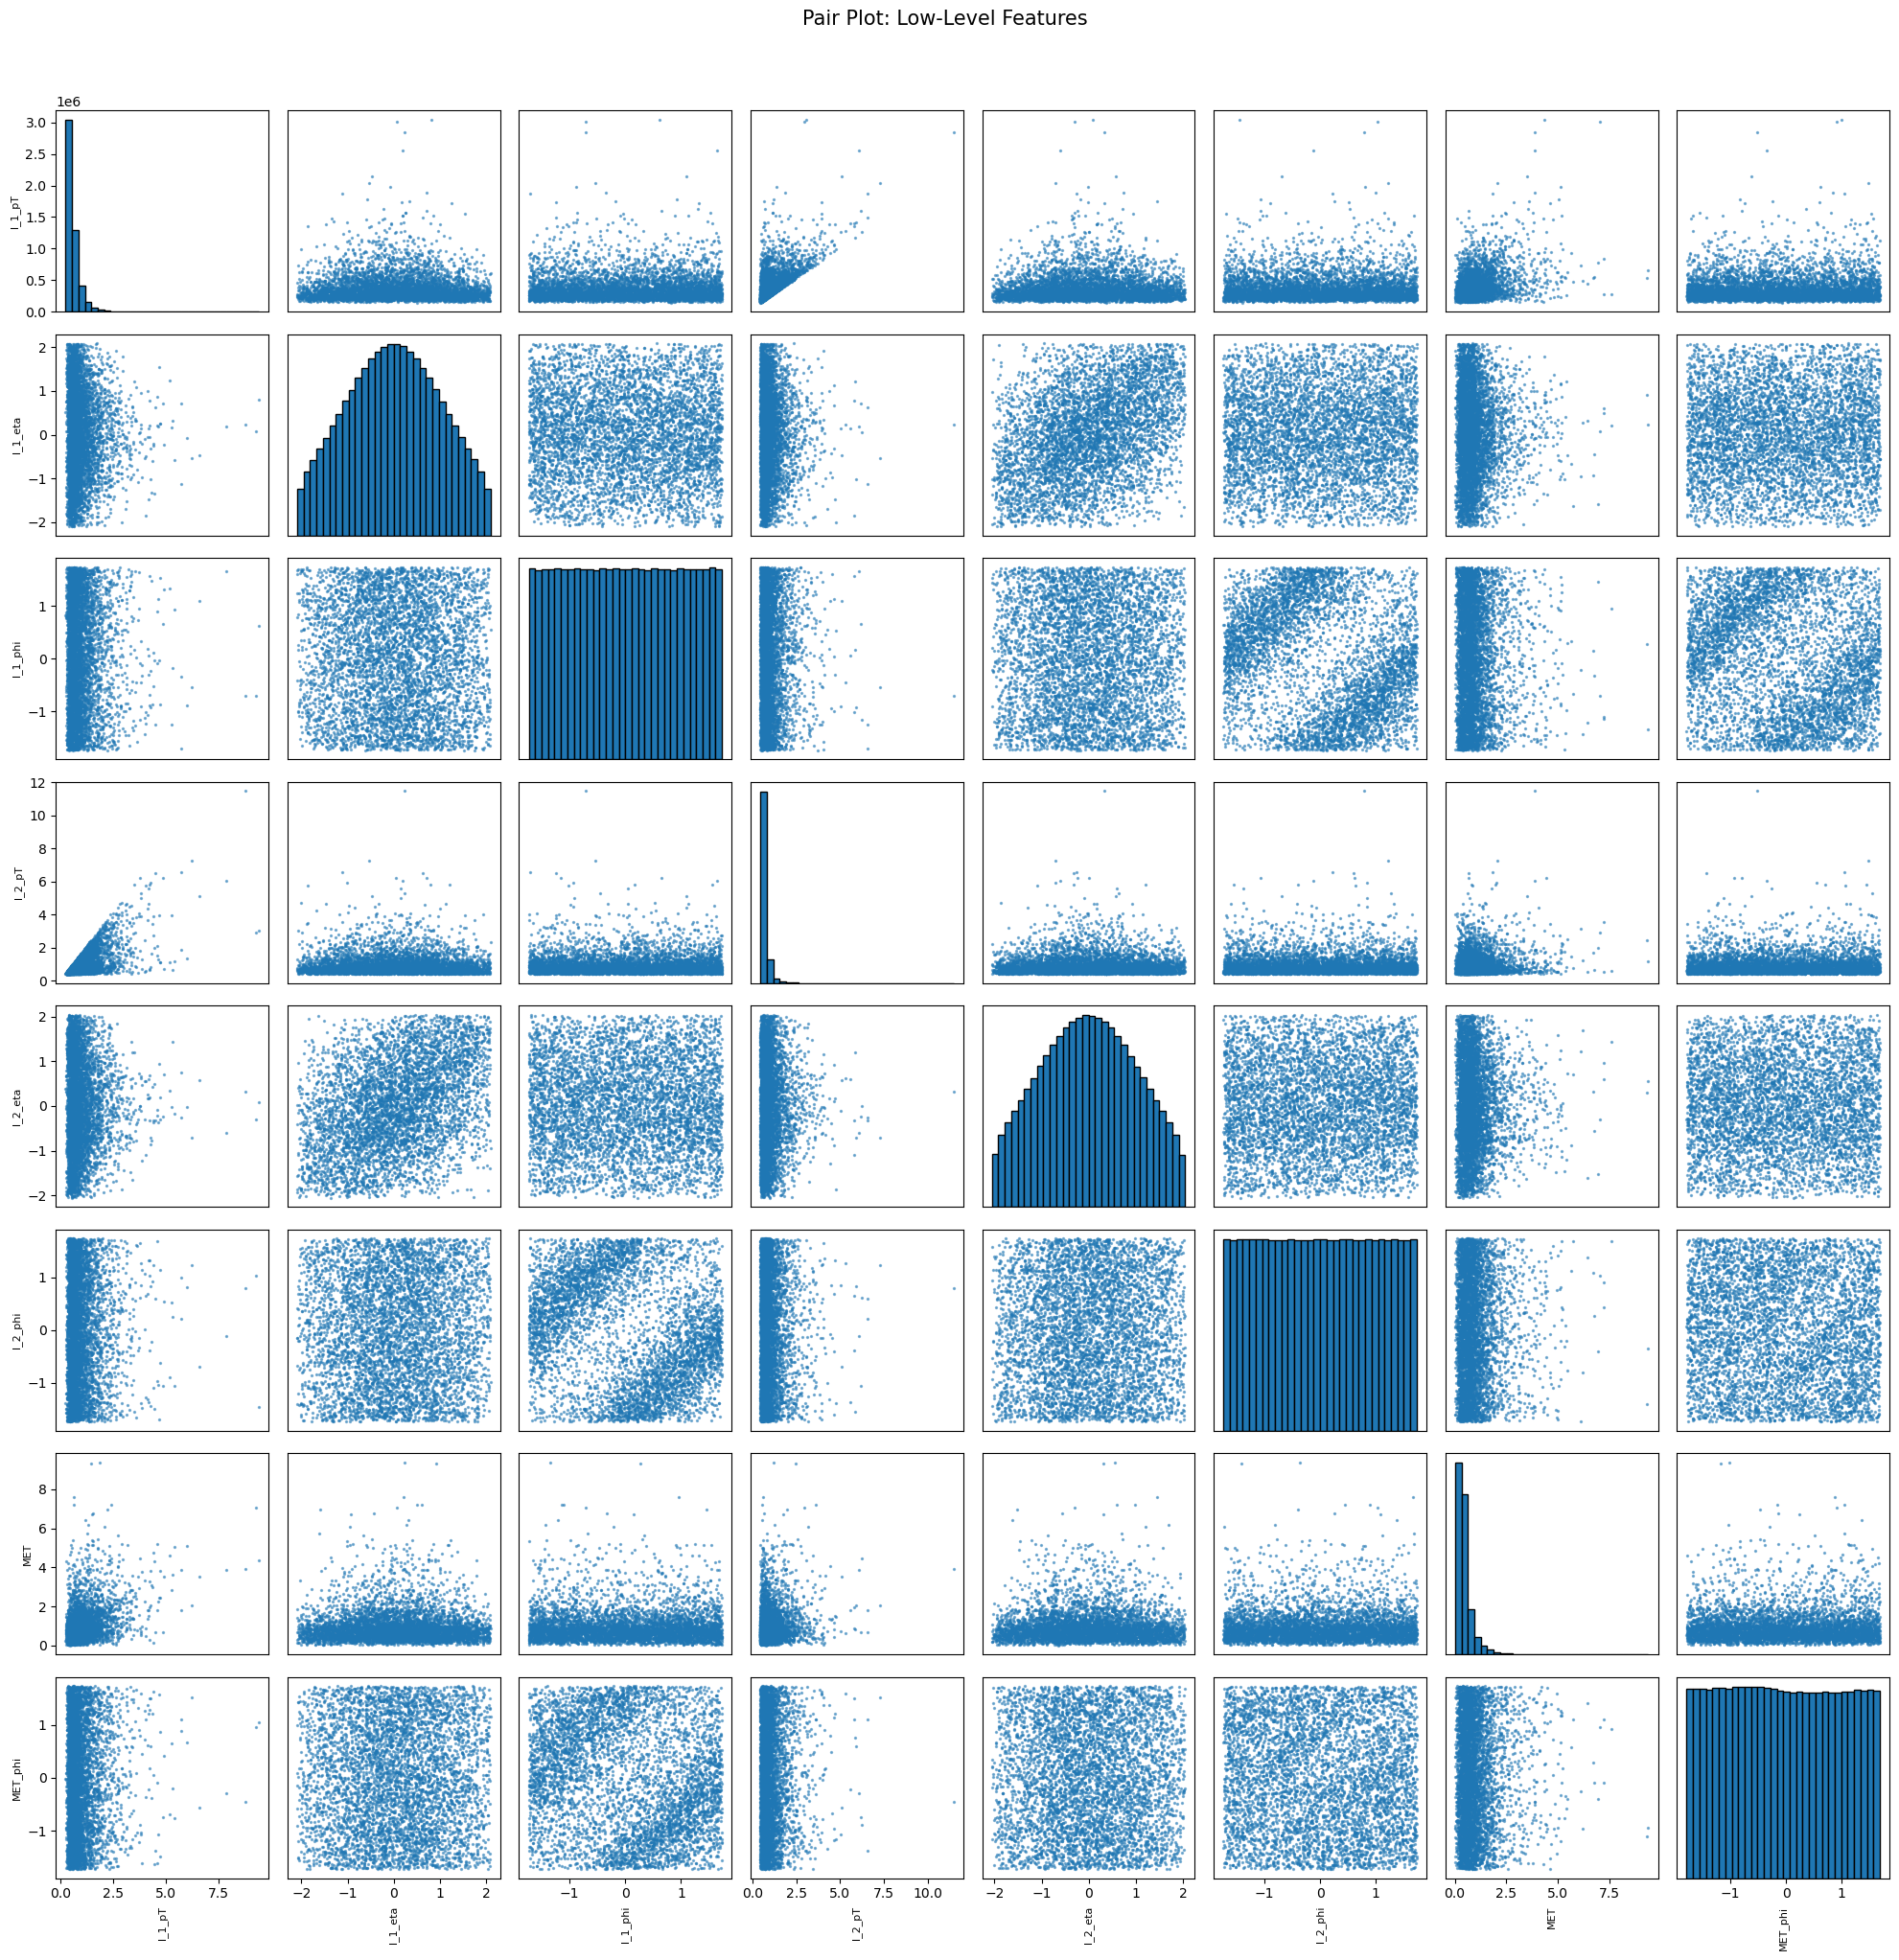

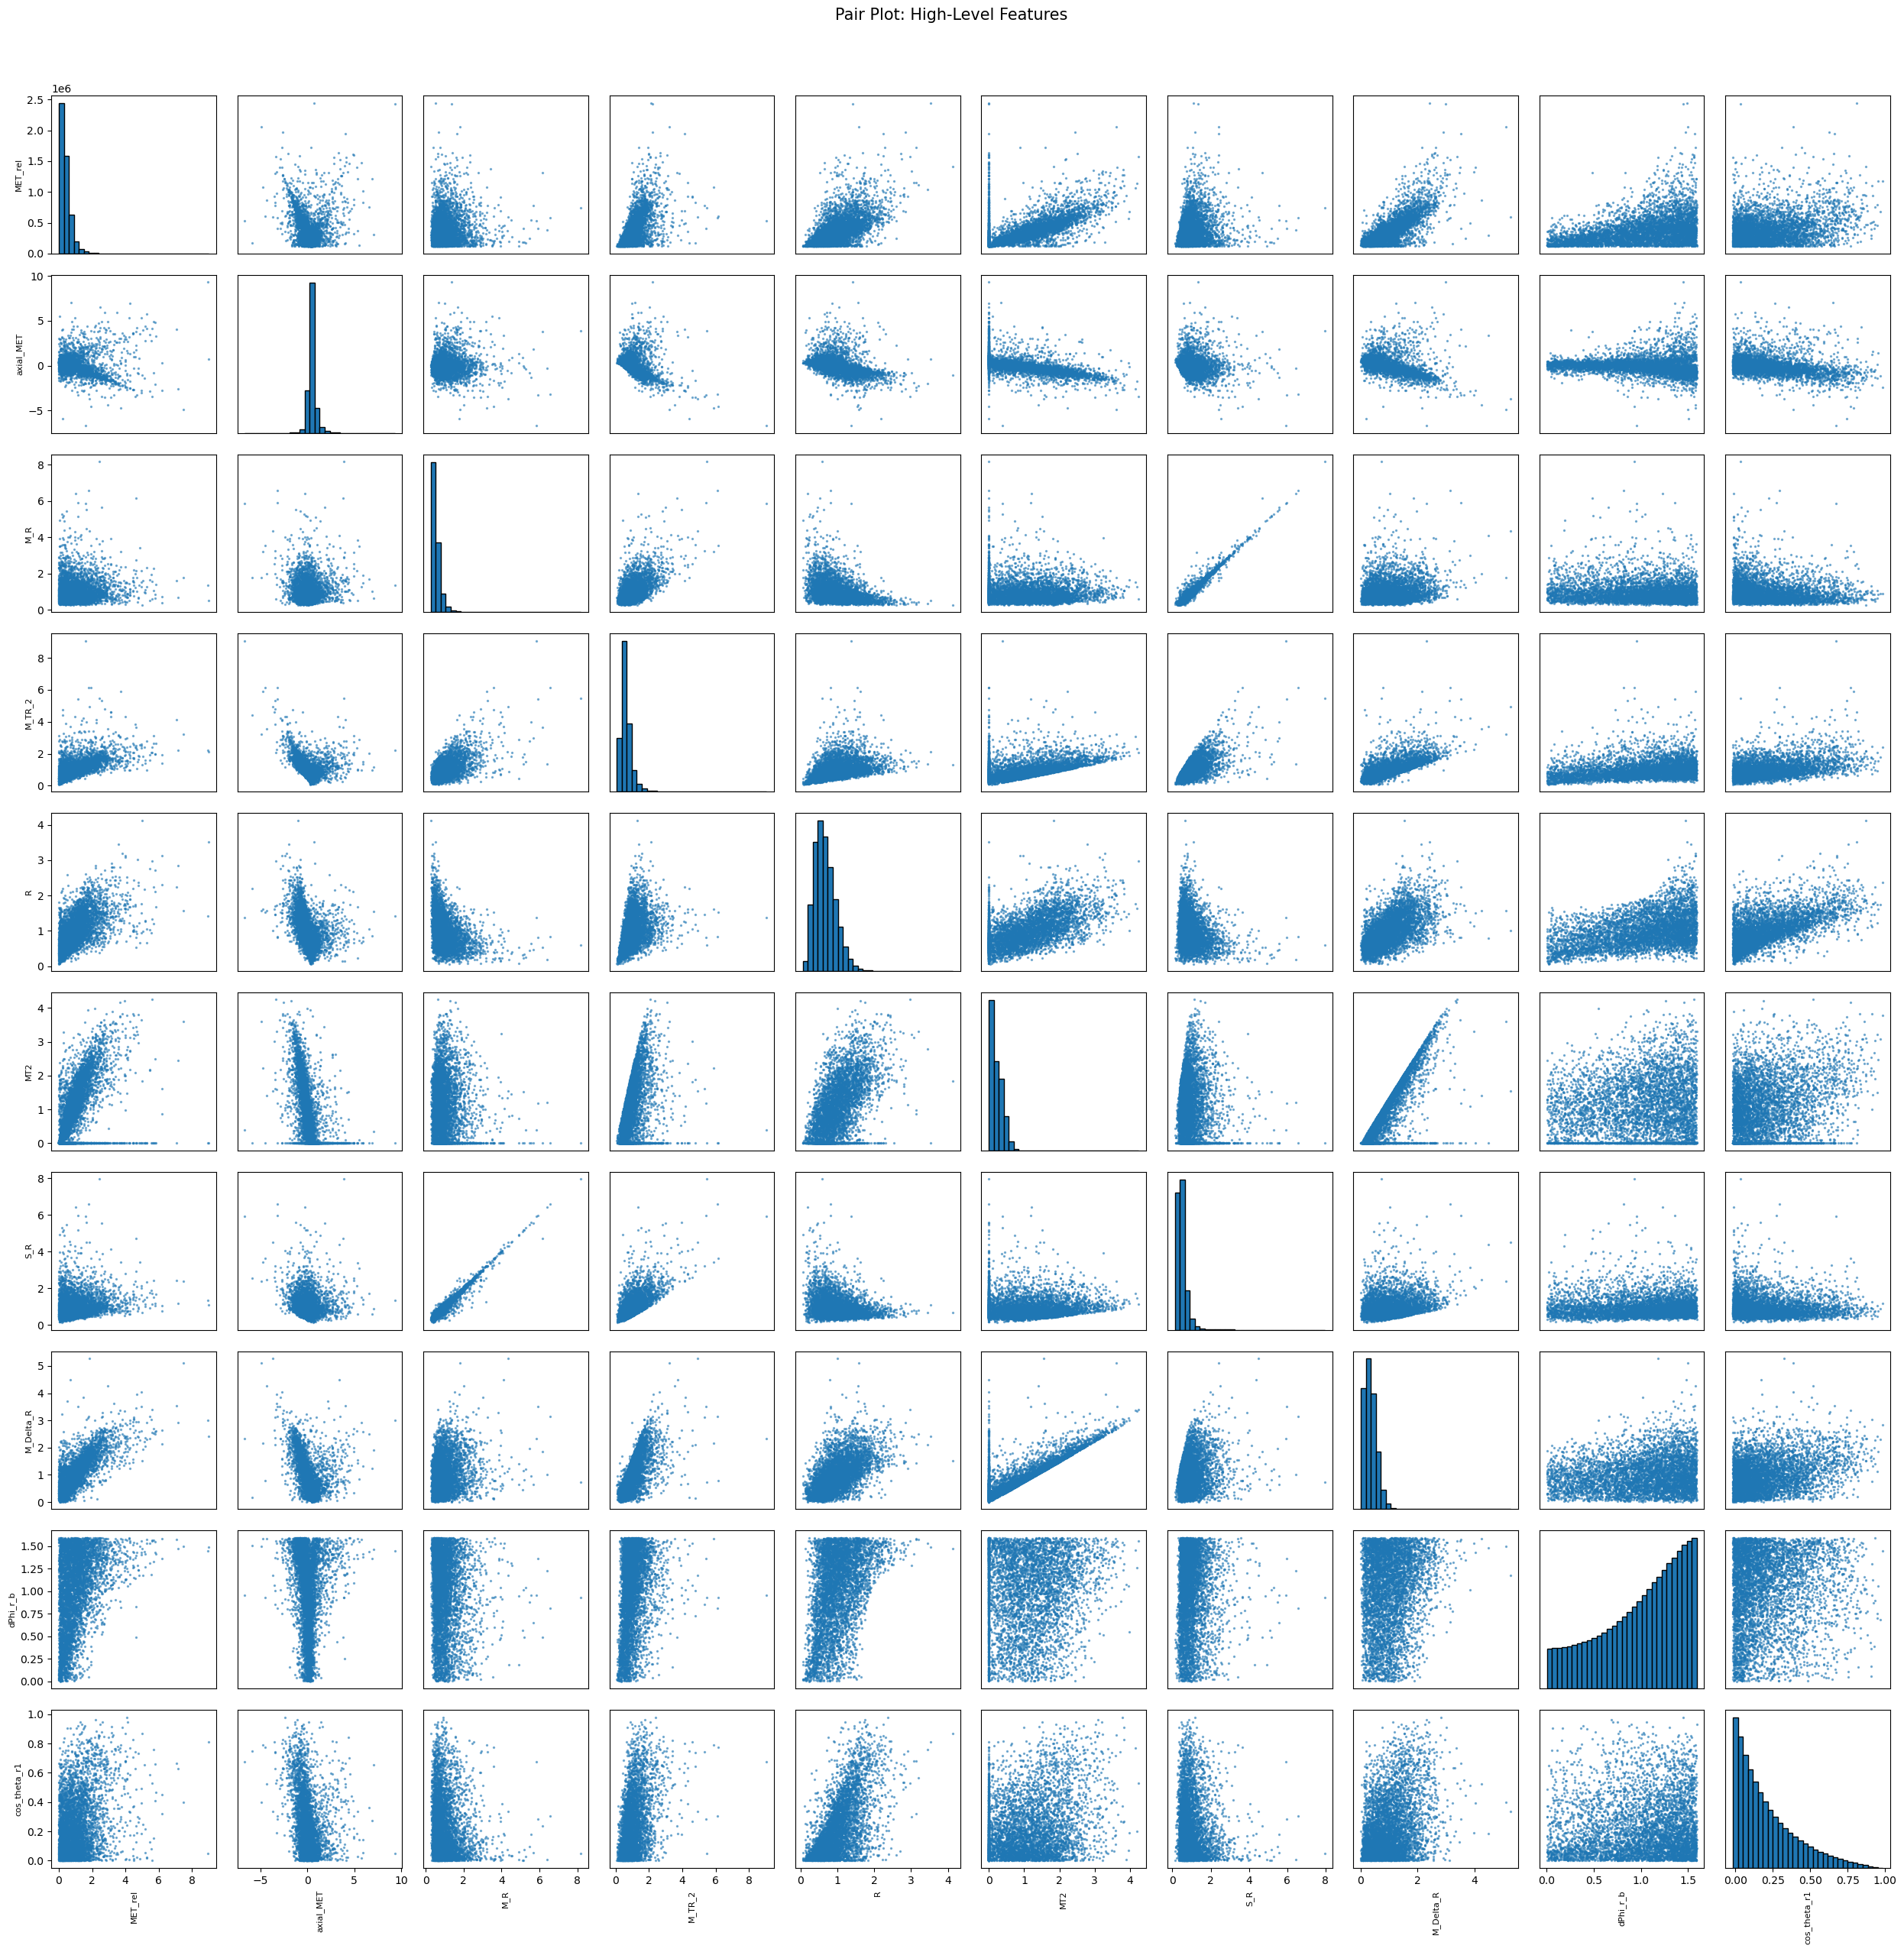

In [12]:
### Part b
import numpy as np
def plot_pair_matrix_2(df, features, title, sample_size=5000, hist_bins=30):
    
    n = len(features)
    rows = cols = n    ### Square grid 

    hist_data = {}             ### Storing histogram counts
    bin_edges = {}             ### Storing histogram bin edges
    for feat in features:
        counts, edges = np.histogram(df[feat], bins=hist_bins)
        hist_data[feat] = counts
        bin_edges[feat] = edges

    sample_df = df.sample(n=min(sample_size, len(df)), random_state=0)      ### Sampling data to speed up scatter plots

    fig, axes = plt.subplots(n, n, figsize=(2.5*n, 2.5*n))
    for i, fi in enumerate(features):
        for j, fj in enumerate(features):
            ax = axes[i, j]
            if i == j:
                edges = bin_edges[fi]
                counts = hist_data[fi]
                widths = edges[1:] - edges[:-1]
                ax.bar(edges[:-1], counts, widths, edgecolor='black')
            else:
                ax.scatter(sample_df[fj], sample_df[fi], s=2, alpha=0.5)

            if i < n-1: ax.set_xticks([])     ### Cleaning up axis labels
            else:       ax.set_xlabel(fj, rotation=90, fontsize=8)
            if j > 0:   ax.set_yticks([])
            else:       ax.set_ylabel(fi, fontsize=8)

    fig.suptitle(title, fontsize=15, y=1.02)
    plt.tight_layout()
    plt.show()
    
plot_pair_matrix_2(df, low_level_features, "Pair Plot: Low-Level Features")

plot_pair_matrix_2(df, high_level_features, "Pair Plot: High-Level Features")

In [ ]:
### Part c

M_r, R, S_r, M_T2

### Exercise 4.2

#### Part a
Install [tabulate](https://github.com/astanin/python-tabulate). 

#### Part b
Use numpy to compute the [covariance matrix](https://numpy.org/doc/stable/reference/generated/numpy.cov.html) and [correlation matrix](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html) between all observabes, and separately between low and high-level features.

#### Part c
Use tabulate to create a well formatted table of the covariance and correlation matrices, with nice headings and appropriate significant figures. Embed the table into this notebook.

#### Part d
Write a function that takes a dataset and appropriate arguments and performs steps b and c.  

Hint: Example code for embedding a `tabulate` table into a notebook:

In [15]:
from IPython.display import HTML, display
import tabulate
table = [["A",1,2],
        ["C",3,4],
        ["D",5,6]]
display(HTML(tabulate.tabulate(table, tablefmt='html', headers=["X","Y","Z"])))

In [15]:
### Part a 
from tabulate import tabulate

In [14]:
### Part b

all_data      = df[low_level_features + high_level_features].values
low_data      = df[low_level_features].values
high_data     = df[high_level_features].values

### Compuing covariance matrices
cov_all  = np.cov(all_data,  rowvar=False)
cov_low  = np.cov(low_data,  rowvar=False)
cov_high = np.cov(high_data, rowvar=False)

### Computing correlation matrices
corr_all  = np.corrcoef(all_data,  rowvar=False)
corr_low  = np.corrcoef(low_data,  rowvar=False)
corr_high = np.corrcoef(high_data, rowvar=False)

print("Covariance matrix for all features:")
print(cov_all)

print("\nCorrelation matrix for all features:")
print(corr_all)

print("\nCovariance matrix for low-level features:")
print(cov_low)

print("\nCorrelation matrix for low-level features:")
print(corr_low)

print("\nCovariance matrix for high-level features:")
print(cov_high)

print("\nCorrelation matrix for high-level features:")
print(corr_high)


Covariance matrix for all features:
[[ 4.72428126e-01 -2.62666897e-04 -2.29060618e-04  3.07887443e-01
  -3.02456872e-04  2.27164310e-04  2.30950772e-01 -6.76375484e-04
   9.85665087e-02 -1.25117429e-02  3.68084648e-01  2.90830895e-01
  -5.92849382e-02 -1.27781651e-02  3.46283105e-01  9.80831420e-02
  -4.70231189e-02  2.25170535e-02]
 [-2.62666897e-04  1.00622400e+00  3.21599952e-04 -3.77895911e-04
   4.05877394e-01  2.97083862e-04 -5.57684419e-04 -5.40623754e-04
  -4.96645666e-04 -4.97511845e-04 -3.08116876e-04 -2.65899836e-04
   1.27738268e-04 -1.57618075e-04 -2.81414480e-04 -5.04145408e-04
   7.96492827e-05  1.45749083e-04]
 [-2.29060618e-04  3.21599952e-04  1.00334220e+00 -1.28546630e-04
   6.41115931e-04 -2.68130132e-01  1.20012378e-03 -1.84183886e-01
   1.52891120e-03 -1.96469455e-03 -1.99692758e-04  8.37778126e-04
   8.76412682e-04  1.75405466e-03  4.49583619e-05  1.31238252e-03
   9.53611330e-04  2.99499583e-04]
 [ 3.07887443e-01 -3.77895911e-04 -1.28546630e-04  4.28003791e-01
 

In [20]:
### Part c

from IPython.display import HTML, display

### Converting Numpy matirx to HTML table 
def format_matrix_html(matrix, headers, title):
    formatted_matrix = np.round(matrix, 2).tolist()
    table = tabulate(formatted_matrix, headers=headers, tablefmt="html", floatfmt=".2f")
    styled_table = f"<h5>{title}</h5>" + table
    return HTML(styled_table)

display(format_matrix_html(cov_all, VarNames[1:], "Covariance Matrix for All Features"))
display(format_matrix_html(corr_all, VarNames[1:], "Correlation Matrix for All Features"))

display(format_matrix_html(cov_low, low_level_features, "Covariance Matrix for Low-Level Features"))
display(format_matrix_html(corr_low, low_level_features, "Correlation Matrix for Low-Level Features"))

display(format_matrix_html(cov_high, high_level_features, "Covariance Matrix for High-Level Features"))
display(format_matrix_html(corr_high, high_level_features, "Correlation Matrix for High-Level Features"))

In [22]:
### Part d

from tabulate import tabulate
from IPython.display import HTML, display
import numpy as np

def compute_and_display_stats(data, feature_names, label=""):

    if isinstance(data, pd.DataFrame):         ### Ensuring data is in NumPy format
        data = data.values

    ### Computing covariance and correlation matrices
    cov_matrix = np.cov(data, rowvar=False)
    corr_matrix = np.corrcoef(data, rowvar=False)

   ### Converting to HTML tables
    def format_matrix_html(matrix, headers, title):
        formatted_matrix = np.round(matrix, 2).tolist()
        table = tabulate(formatted_matrix, headers=headers, tablefmt="html", floatfmt=".2f")
        styled_table = f"<h3>{title}</h3>" + table
        return HTML(styled_table)

    display(format_matrix_html(cov_matrix, feature_names, f"Covariance Matrix for {label}"))
    display(format_matrix_html(corr_matrix, feature_names, f"Correlation Matrix for {label}"))

    
compute_and_display_stats(df[VarNames[1:]], VarNames[1:], "All Features")
compute_and_display_stats(df[low_level_features], low_level_features, "Low-Level Features")
compute_and_display_stats(df[high_level_features], high_level_features, "High-Level Features")

## Exercise 5: Selection

### Exercise 5.1

Part a
By looking at the signal/background distributions for each observable (e.g. $x$) determine which selection criteria would be optimal: 

1. $x > x_c$
2. $x < x_c$
3. $|x - \mu| > x_c$
4. $|x - \mu| < x_c$

where $x_c$ is value to be determined below.

### Exercise 5.2

Plot the True Positive Rate (TPR) (aka signal efficiency $\epsilon_S(x_c)$) and False Positive Rate (FPR) (aka background efficiency $\epsilon_B(x_c)$) as function of $x_c$ for applying the strategy in part a to each observable. 

### Exercise 5.3
Assume 3 different scenarios corresponding to different numbers of signal and background events expected in data:

1. Expect $N_S=10$, $N_B=100$.
1. Expect $N_S=100$, $N_B=1000$.
1. Expect $N_S=1000$, $N_B=10000$.
1. Expect $N_S=10000$, $N_B=100000$.

Plot the significance ($\sigma_{S'}$) for each observable as function of $x_c$ for each scenario, where 

$\sigma_{S'}= \frac{N'_S}{\sqrt{N'_S+N'_B}}$

and $N'_{S,B} = \epsilon_{S,B}(x_c) * N_{S,B}$.

In [ ]:
### Exercise 5.1

#### 1. 'l_1_pt', 'MET', 'cos_theta_r1', 'M_R','M_TR_2','MT2'
#### 2. 'R','MET_rel'
#### 3. 'axial_MET','S_R','MET_phi'
#### 4. 'l_1_eta','l_2_phi', 'l_1_phi','l_2_pT

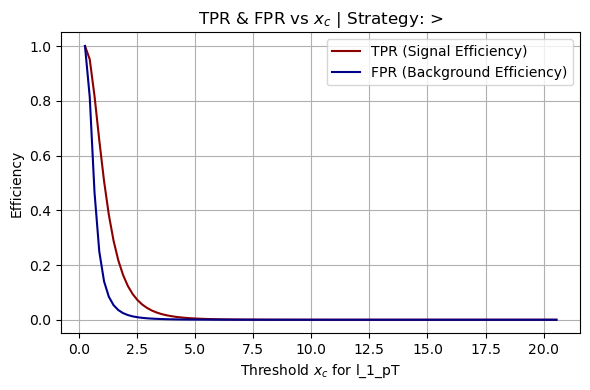

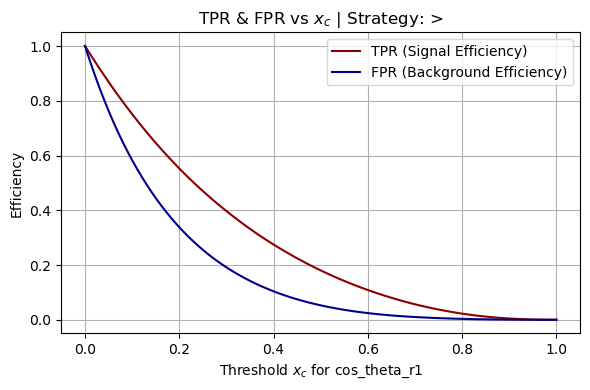

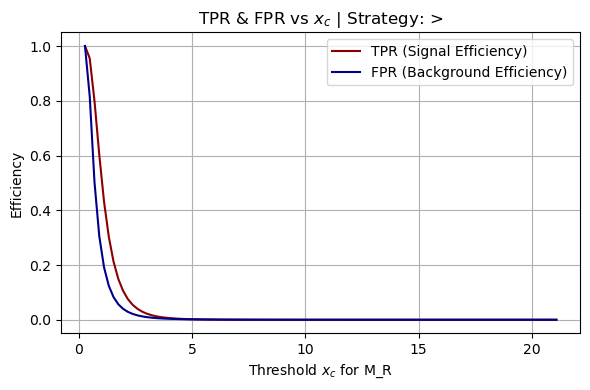

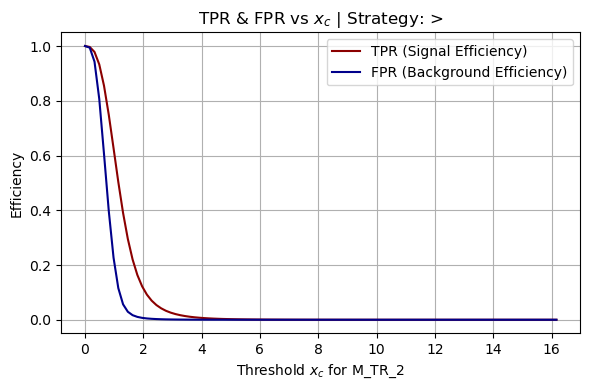

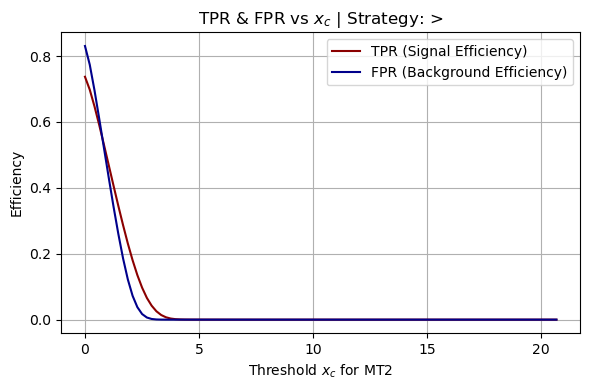

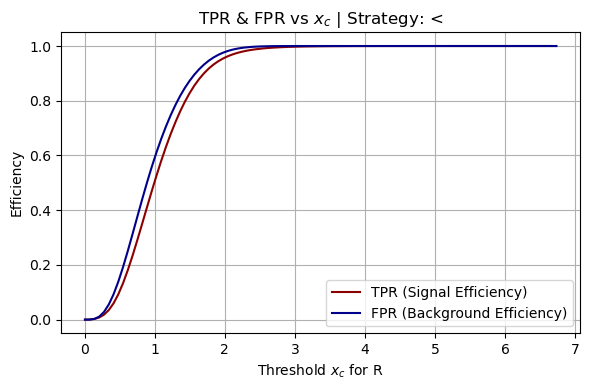

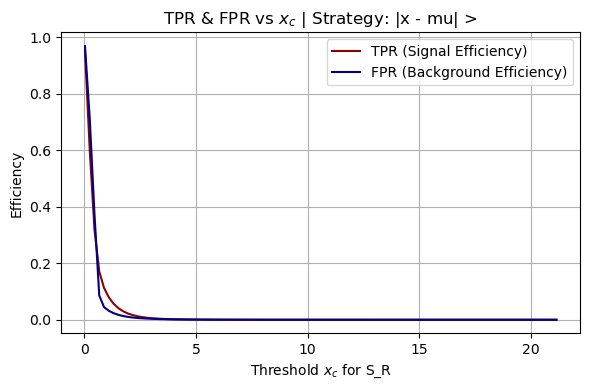

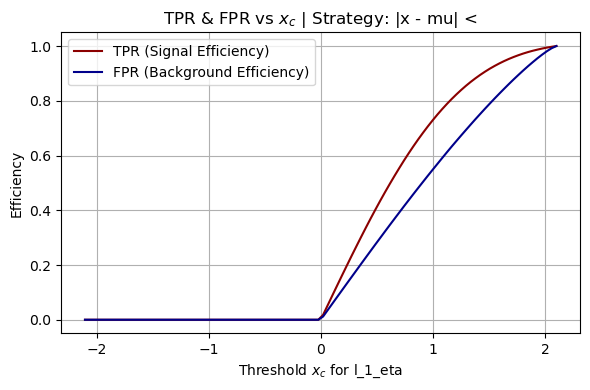

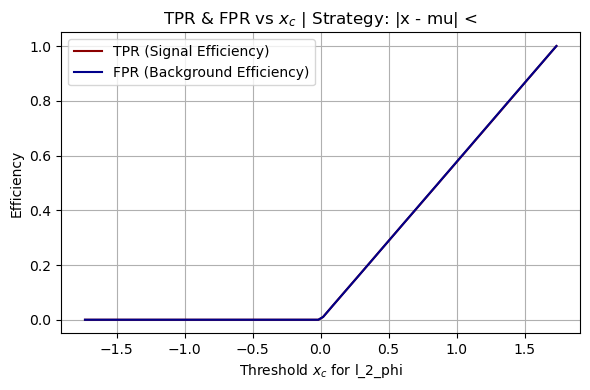

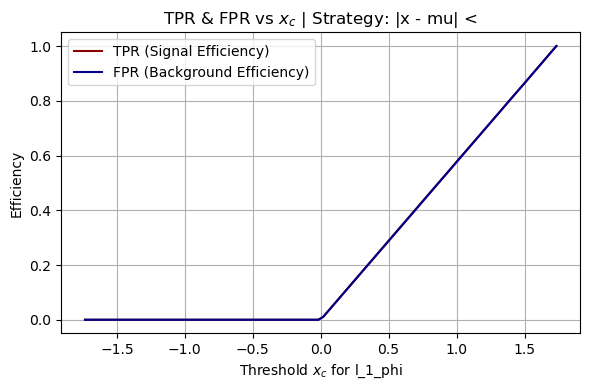

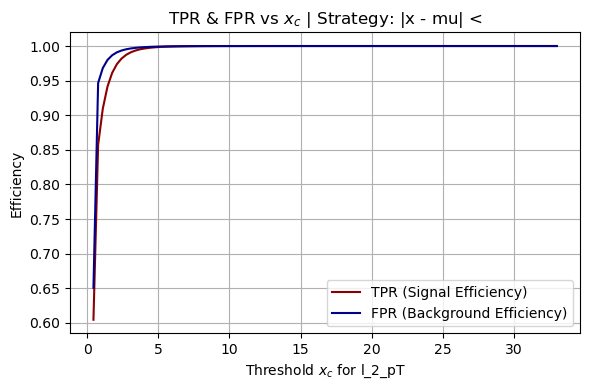

In [20]:
### Exercise 5.2

def plot_tpr_fpr_custom(df, feature, cut_type=">"):

    x_vals = df[feature].values
    y_true = df["signal"].values

    ### Creating a range of threshold values
    x_min, x_max = np.min(x_vals), np.max(x_vals)
    thresholds = np.linspace(x_min, x_max, 100)
    tpr = []       ### Stores True Positive Rate Values
    fpr = []       ### Stores False Positive Rate Values

    mu = np.mean(x_vals)

    for x_c in thresholds:
        if cut_type == ">":
            selected = x_vals > x_c
        elif cut_type == "<":
            selected = x_vals < x_c
        elif cut_type == "|x - mu| >":
            selected = np.abs(x_vals - mu) > x_c
        elif cut_type == "|x - mu| <":
            selected = np.abs(x_vals - mu) < x_c
        else:
            raise ValueError("Invalid cut type")

        tp = np.sum((y_true == 1) & selected)
        fp = np.sum((y_true == 0) & selected)

        tpr.append(tp / np.sum(y_true == 1))
        fpr.append(fp / np.sum(y_true == 0))

    plt.figure(figsize=(6, 4))
    plt.plot(thresholds, tpr, label="TPR (Signal Efficiency)", color="darkred")
    plt.plot(thresholds, fpr, label="FPR (Background Efficiency)", color="darkblue")
    plt.xlabel(f"Threshold $x_c$ for {feature}")
    plt.ylabel("Efficiency")
    plt.title(f"TPR & FPR vs $x_c$ | Strategy: {cut_type}")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

        
### For x > x_c
for f in ['l_1_pT', 'MET', 'cos_theta_r1', 'M_R', 'M_TR_2', 'MT2']:
    plot_tpr_fpr_custom(df, f, cut_type=">")

### For x < x_c
for f in ['R', 'MET_rel']:
    plot_tpr_fpr_custom(df, f, cut_type="<")

### For |x - μ| > x_c
for f in ['axial_MET', 'S_R', 'MET_phi']:
    plot_tpr_fpr_custom(df, f, cut_type="|x - mu| >")

### For |x - μ| < x_c
for f in ['l_1_eta', 'l_2_phi', 'l_1_phi', 'l_2_pT']:
    plot_tpr_fpr_custom(df, f, cut_type="|x - mu| <")



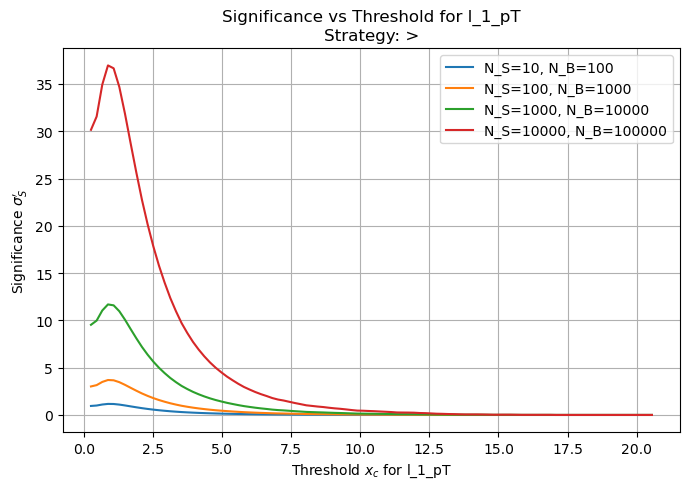

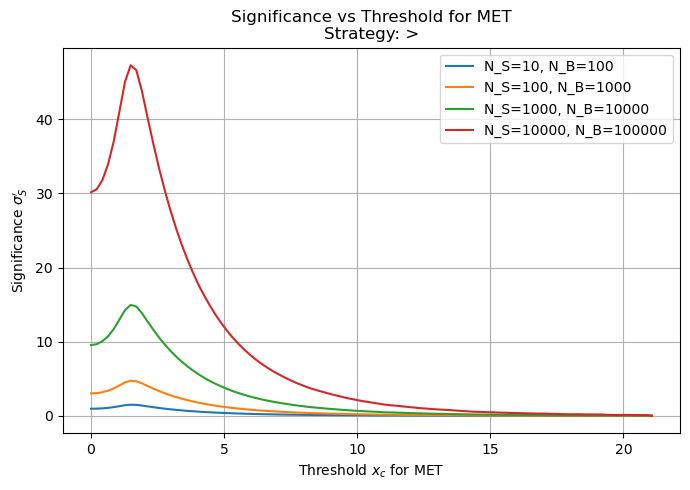

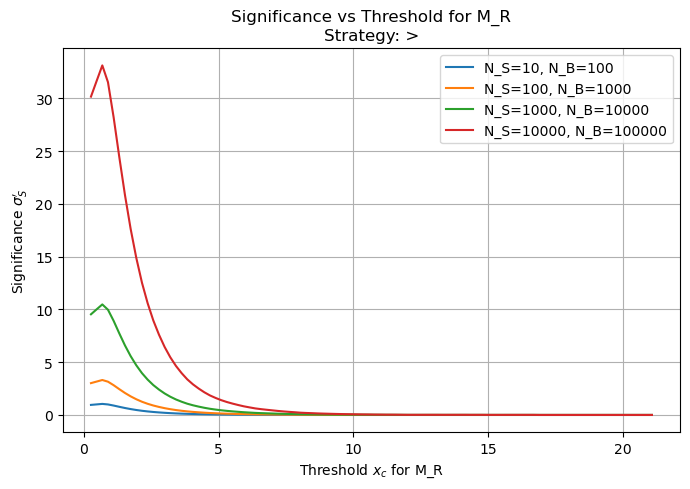

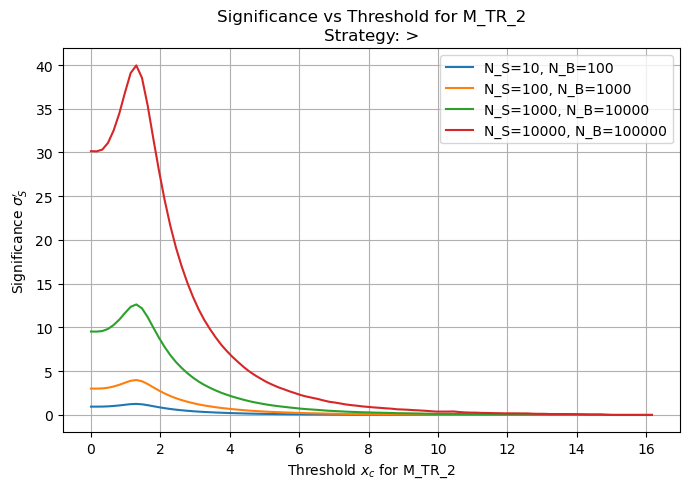

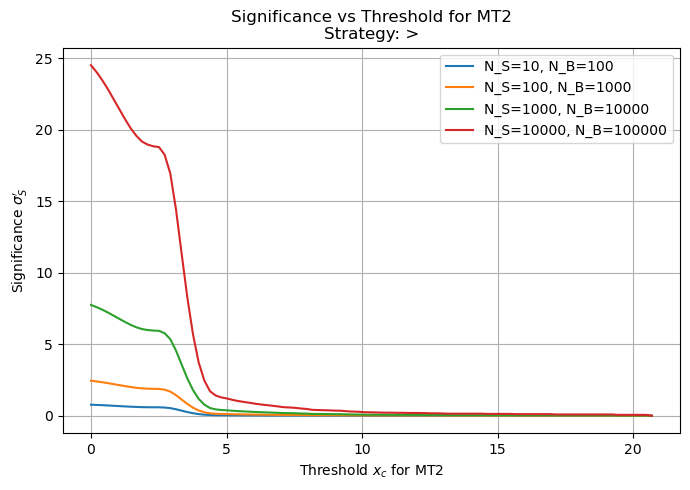

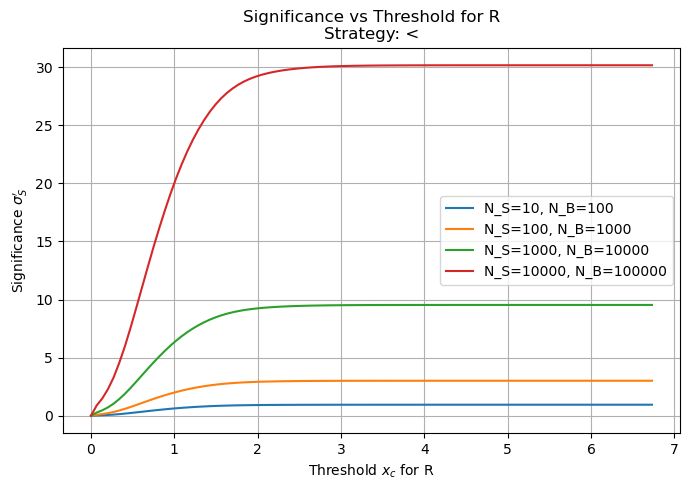

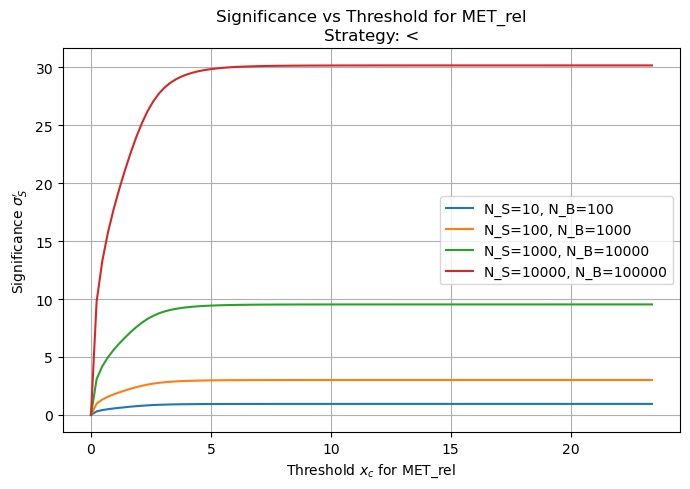

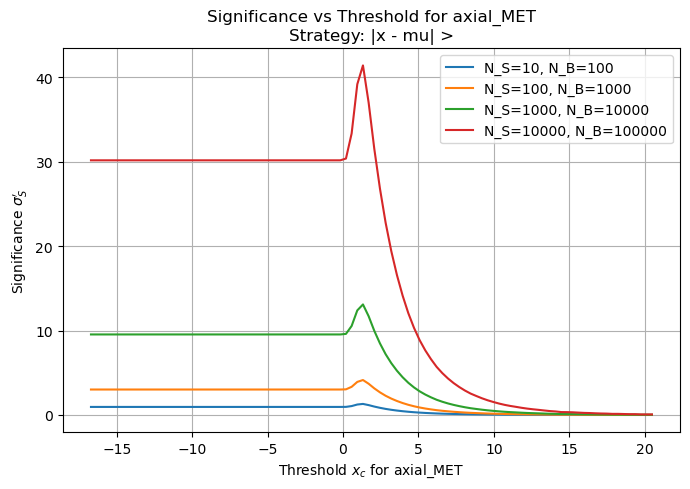

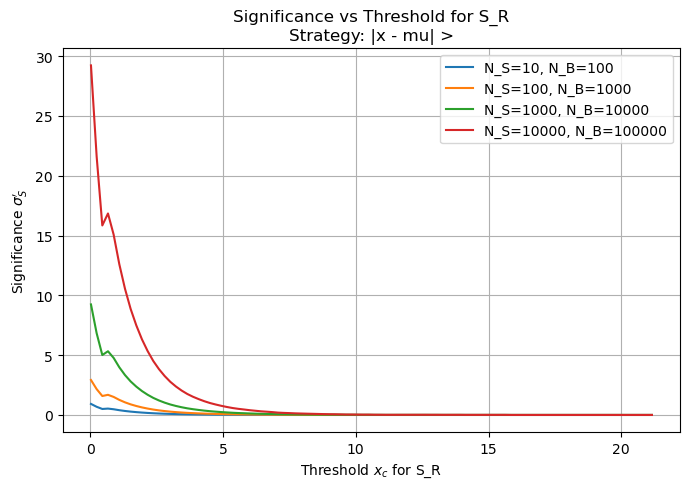

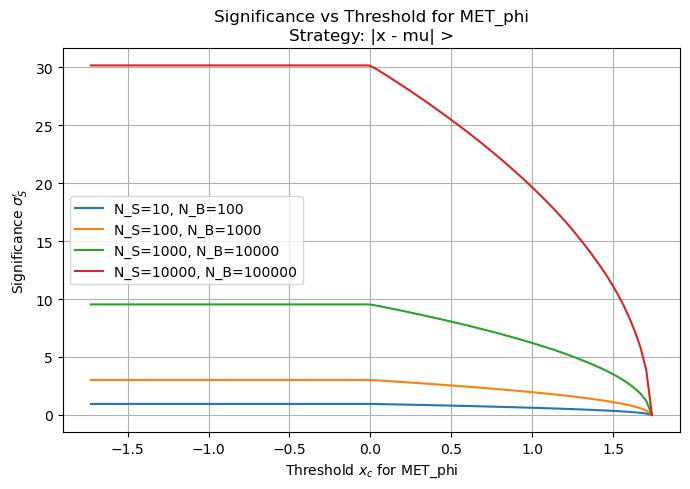

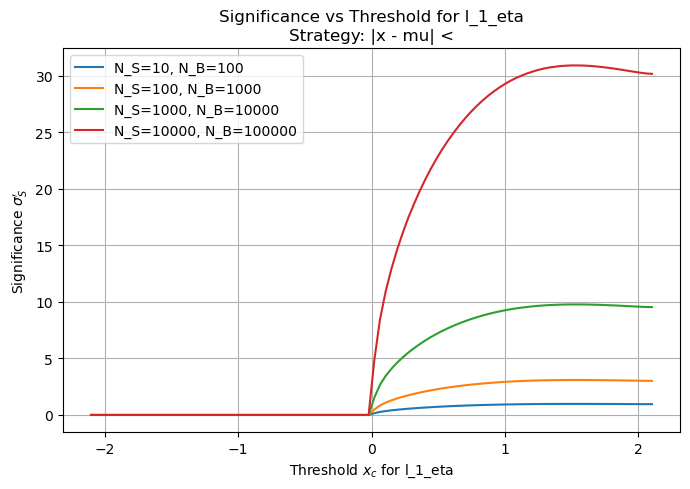

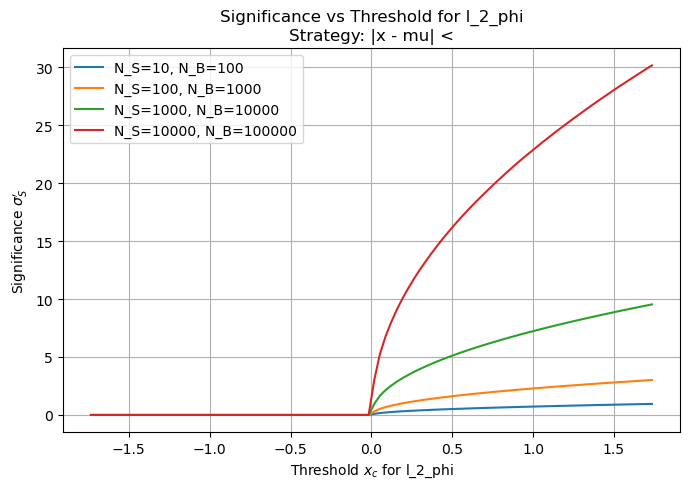

In [12]:
### Exercise 5.3
def plot_significance(df, feature, cut_type=">"):

    x_vals = df[feature].values
    y_true = df["signal"].values

    x_min, x_max = np.min(x_vals), np.max(x_vals)    ### Thresholds
    thresholds = np.linspace(x_min, x_max, 100)
    mu = np.mean(x_vals)

    scenarios = [ (10, 100), (100, 1000), (1000, 10000), (10000, 100000)]

    plt.figure(figsize=(7, 5))
    for N_S, N_B in scenarios:
        sig_list = []

        for x_c in thresholds:
            if cut_type == ">":
                selected = x_vals > x_c
            elif cut_type == "<":
                selected = x_vals < x_c
            elif cut_type == "|x - mu| >":
                selected = np.abs(x_vals - mu) > x_c
            elif cut_type == "|x - mu| <":
                selected = np.abs(x_vals - mu) < x_c
            else:
                raise ValueError("Invalid cut type")

            tp = np.sum((y_true == 1) & selected)
            fp = np.sum((y_true == 0) & selected)

            eff_S = tp / np.sum(y_true == 1)
            eff_B = fp / np.sum(y_true == 0)

            Np_S = eff_S * N_S
            Np_B = eff_B * N_B

            if Np_S + Np_B > 0:
                sigma = Np_S / np.sqrt(Np_S + Np_B)
            else:
                sigma = 0

            sig_list.append(sigma)

        plt.plot(thresholds, sig_list, label=f"N_S={N_S}, N_B={N_B}")

    plt.xlabel(f"Threshold $x_c$ for {feature}")
    plt.ylabel(r"Significance $\sigma_S'$")
    plt.title(f"Significance vs Threshold for {feature}\nStrategy: {cut_type}")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    
### For x > x_c
for f in ['l_1_pT', 'MET', 'cos_theta_r1', 'M_R', 'M_TR_2', 'MT2']:
    plot_significance(df, f, cut_type=">")

### FOr x < x_c
for f in ['R', 'MET_rel']:
    plot_significance(df, f, cut_type="<")

### For |x - μ| > x_c
for f in ['axial_MET', 'S_R', 'MET_phi']:
    plot_significance(df, f, cut_type="|x - mu| >")

### For |x - μ| < x_c
for f in ['l_1_eta', 'l_2_phi', 'l_1_phi', 'l_2_pT']:
    plot_significance(df, f, cut_type="|x - mu| <")

## Exercise 6: Cut Flow


### Exercise 6.1

For each above scenario, choose a subset (minumum 3) of observables to use for selections, and values of $x_c$ based on your significance plots (part 3c). 

### Exercise 6.2
Create a "cut-flow" table for each scenario where you successively make the selections on each observable and tabulate $\epsilon_S$, $\epsilon_B$, $N'_S$, $N'_B$, and $\sigma_{S'}$.

### Exercise 6.3
In 3c above you computed the significance for each observable assuming to make no other selections on any other observable. If the variables are correlated, then this assumption can lead to non-optimial results when selecting on multiple variables. By looking at the correlation matrices and your answers to 4b, identify where this effect could be most detrimental to the significance. Attempt to correct the issue by applying the selection in one observable and then optimizing (part 3c) for a second observable. What happens if you change the order of your selection (make selection on second and optimize on first)?




In [14]:
### Exercise 6.1
import numpy as np

def cut_flow_significance(df, cuts, scenarios):

    y_true = df["signal"].values   ### Original signal or background labels
    df_selected = df.copy()

    ### Applying each cut one by one
    for feature, cut_type, x_c in cuts:
        x_vals = df_selected[feature].values
        if cut_type == ">":
            mask = x_vals > x_c
        elif cut_type == "<":
            mask = x_vals < x_c
        elif cut_type == "|x - mu| >":
            mu = np.mean(x_vals)
            mask = np.abs(x_vals - mu) > x_c
        elif cut_type == "|x - mu| <":
            mu = np.mean(x_vals)
            mask = np.abs(x_vals - mu) < x_c
        else:
            raise ValueError("Invalid cut_type")
        df_selected = df_selected[mask]

    y_sel = df_selected["signal"].values       ### Comouting efficiencies
    eff_S = np.sum(y_sel == 1) / np.sum(y_true == 1)
    eff_B = np.sum(y_sel == 0) / np.sum(y_true == 0)

    print("Applied Cuts:")
    for feature, cut_type, x_c in cuts:
        print(f" - {feature} {cut_type} {x_c}")

    print("\nResults:")
    for N_S, N_B in scenarios:
        Np_S = eff_S * N_S
        Np_B = eff_B * N_B
        if Np_S + Np_B > 0:
            sigma = Np_S / np.sqrt(Np_S + Np_B)
        else:
            sigma = 0
        print(f"N_S={N_S}, N_B={N_B} → N'_S={Np_S:.2f}, N'_B={Np_B:.2f}, σ'_S={sigma:.3f}")



cuts = [("MET", ">", 170),
        ("M_R", ">", 540),
        ("MT2", ">", 240)]


scenarios = [(10, 100),
             (100, 1000),
             (1000, 10000),
             (10000, 100000)]

cut_flow_significance(df, cuts, scenarios)

Applied Cuts:
 - MET > 170
 - M_R > 540
 - MT2 > 240

Results:
N_S=10, N_B=100 → N'_S=0.00, N'_B=0.00, σ'_S=0.000
N_S=100, N_B=1000 → N'_S=0.00, N'_B=0.00, σ'_S=0.000
N_S=1000, N_B=10000 → N'_S=0.00, N'_B=0.00, σ'_S=0.000
N_S=10000, N_B=100000 → N'_S=0.00, N'_B=0.00, σ'_S=0.000


In [15]:
### Exercise 6.2

def make_cutflow_table(df, cuts, N_S, N_B):
    
    total_signal = np.sum(df["signal"] == 1)
    total_bkg    = np.sum(df["signal"] == 0)
    remaining    = df.copy()
    
    rows = []
    ### No cut values
    eff_S = 1.0
    eff_B = 1.0
    Np_S  = N_S
    Np_B  = N_B
    sigma = Np_S / np.sqrt(Np_S + Np_B) if (Np_S + Np_B)>0 else 0
    rows.append({
        "Step": "None",
        "ε_S": eff_S,
        "ε_B": eff_B,
        "N′_S": Np_S,
        "N′_B": Np_B,
        "σ′_S": sigma})
    
    for feature, cut_type, x_c in cuts:
        x = remaining[feature].values
        if cut_type == ">":
            mask = x > x_c
        elif cut_type == "<":
            mask = x < x_c
        elif cut_type == "|x - mu| >":
            mu = x.mean()
            mask = np.abs(x - mu) > x_c
        elif cut_type == "|x - mu| <":
            mu = x.mean()
            mask = np.abs(x - mu) < x_c
        else:
            raise ValueError(f"Unknown cut type {cut_type}")
        
        remaining = remaining[mask]
        n_sig = np.sum(remaining["signal"] == 1)
        n_bkg = np.sum(remaining["signal"] == 0)
        
        eff_S = n_sig / total_signal
        eff_B = n_bkg / total_bkg
        Np_S  = eff_S * N_S
        Np_B  = eff_B * N_B
        sigma = Np_S / np.sqrt(Np_S + Np_B) if (Np_S + Np_B)>0 else 0
        
        rows.append({
            "Step": f"{feature} {cut_type} {x_c}",
            "ε_S": eff_S,
            "ε_B": eff_B,
            "N′_S": Np_S,
            "N′_B": Np_B,
            "σ′_S": sigma})
    
    return pd.DataFrame(rows)


cuts = [("MET", ">", 170),
        ("M_R", ">", 540),
        ("MT2", ">", 240)]

scenarios = [(10, 100),
             (100, 1000),
             (1000, 10000),
             (10000, 100000)]

for N_S, N_B in scenarios:
    print(f"\nCut-flow for N_S={N_S}, N_B={N_B}")
    table = make_cutflow_table(df, cuts, N_S, N_B)
    display(table.style.format({
        "ε_S": "{:.3f}",
        "ε_B": "{:.3f}",
        "N′_S": "{:.1f}",
        "N′_B": "{:.1f}",
        "σ′_S": "{:.3f}"}))


Cut-flow for N_S=10, N_B=100



Cut-flow for N_S=100, N_B=1000



Cut-flow for N_S=1000, N_B=10000



Cut-flow for N_S=10000, N_B=100000


In [19]:
### Exercise 6.3

cut_plan_1 = [("M_TR_2",    ">", 1.3),
              ("MET_rel",   ">", 1.7),
              ("M_Delta_R", ">", 2.5)]

cut_plan_2 = [("M_Delta_R", ">", 2.5),
              ("MET_rel",   ">", 1.7),
              ("M_TR_2",    ">", 1.3)]

### Defining the scenario
N_S = 100
N_B = 1000


print("Plan 1: M_TR_2 → MET_rel → M_Delta_R")
res1 = make_cutflow_table(df, cut_plan_1, N_S, N_B)
display(res1.style.format({
    "ε_S": "{:.3f}", "ε_B": "{:.3f}", "N′_S": "{:.1f}", "N′_B": "{:.1f}", "σ′_S": "{:.3f}"}))

print("\nPlan 2: M_Delta_R → MET_rel → M_TR_2")
res2 = make_cutflow_table(df, cut_plan_2, N_S, N_B)
display(res2.style.format({
    "ε_S": "{:.3f}", "ε_B": "{:.3f}", "N′_S": "{:.1f}", "N′_B": "{:.1f}", "σ′_S": "{:.3f}"}))


Plan 1: M_TR_2 → MET_rel → M_Delta_R



Plan 2: M_Delta_R → MET_rel → M_TR_2


## Exercise 7: ROC Curves

### Exercise 7.1
For the top 3 observables you identified earlier, create one figure overlaying the Reciever Operating Characteristic (ROC) curves for the 3 observables. Compute the area under the curves and report it in the legend of the figure.

### Exercise 7.2
Write a function that you can use to quickly create the figure in part a with other observables and different conditions. Note that you will likely revise this function as you do the remainder of the lab.

### Exercise 7.3
Use the function from part b to compare the ROC curves for the successive selections in lab 3, exercise 4. Specifically, plot the ROC curve after each selection.

### Exercise 7.4
Use your function and appropriate example to demonstrate the effect (if any) of changing order of the successive selections.



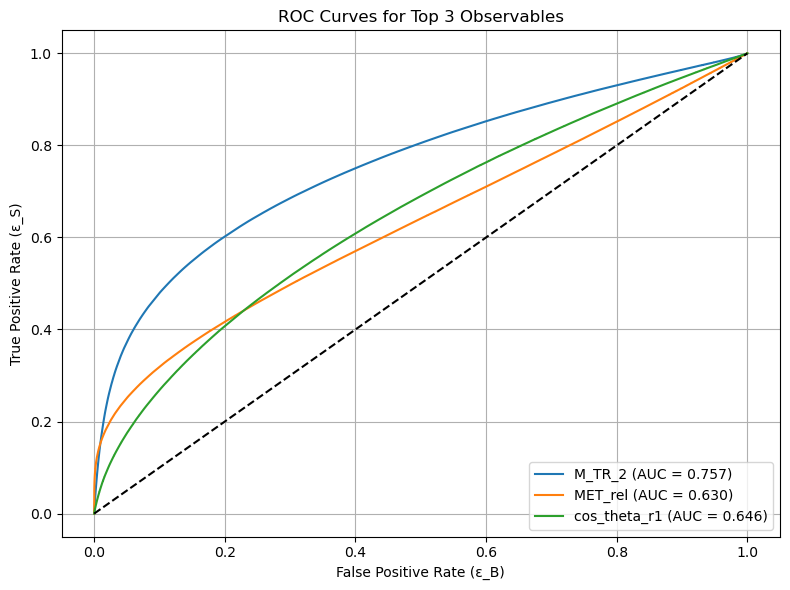

In [11]:
### Exercise 7.1

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curves(df, observables):
    
    y_true = df['signal'].values
    plt.figure(figsize=(8, 6))
    
    for feature in observables:
        scores = df[feature].values       ### Getting feature values
        fpr, tpr, _ = roc_curve(y_true, scores)    ### Computing false psotive rate values
        roc_auc = auc(fpr, tpr)            ### Computing area under curve
        
        plt.plot(fpr, tpr, label=f"{feature} (AUC = {roc_auc:.3f})")
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title("ROC Curves for Top 3 Observables")
    plt.xlabel("False Positive Rate (ε_B)")
    plt.ylabel("True Positive Rate (ε_S)")
    plt.grid(True)
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.show()
    
    
top_observables = ["M_TR_2", "MET_rel", "cos_theta_r1"]
plot_roc_curves(df, top_observables)

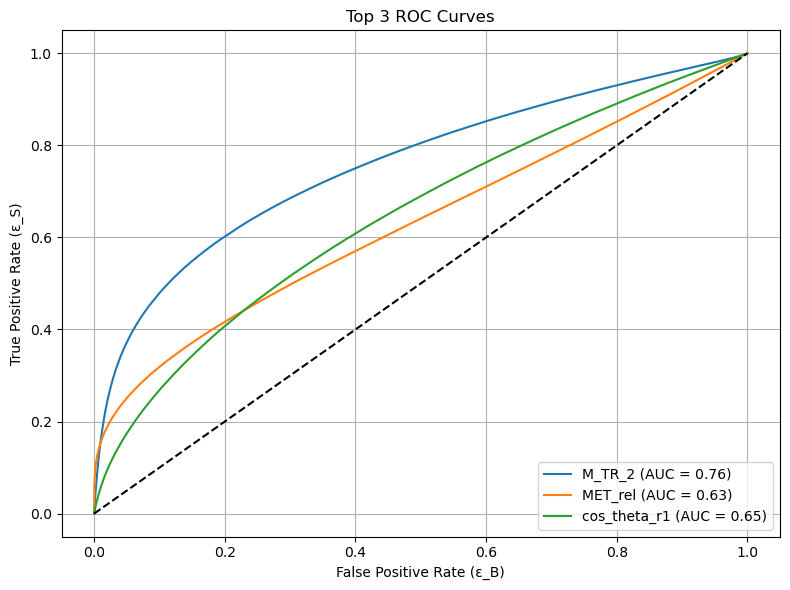

In [13]:
### Exercise 7.2

### Plotting ROC curves for mutiple features
def plot_multi_roc(df, observables, title="ROC Curves", signal_label="signal", normalize=False, style_options=None):

    y_true = df[signal_label].values
    plt.figure(figsize=style_options.get("figsize", (8, 6)) if style_options else (8, 6))

    for feature in observables:
        x = df[feature].values

        fpr, tpr, _ = roc_curve(y_true, x)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{feature} (AUC = {roc_auc:.2f})")

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate (ε_B)")
    plt.ylabel("True Positive Rate (ε_S)")
    plt.title(title)
    plt.grid(True)
    legend_loc = style_options.get("legend_loc", "lower right") if style_options else "lower right"
    plt.legend(loc=legend_loc)
    plt.tight_layout()
    plt.show()
    
    
top_observables = ["M_TR_2", "MET_rel", "cos_theta_r1"]

plot_multi_roc(df, top_observables, title="Top 3 ROC Curves")



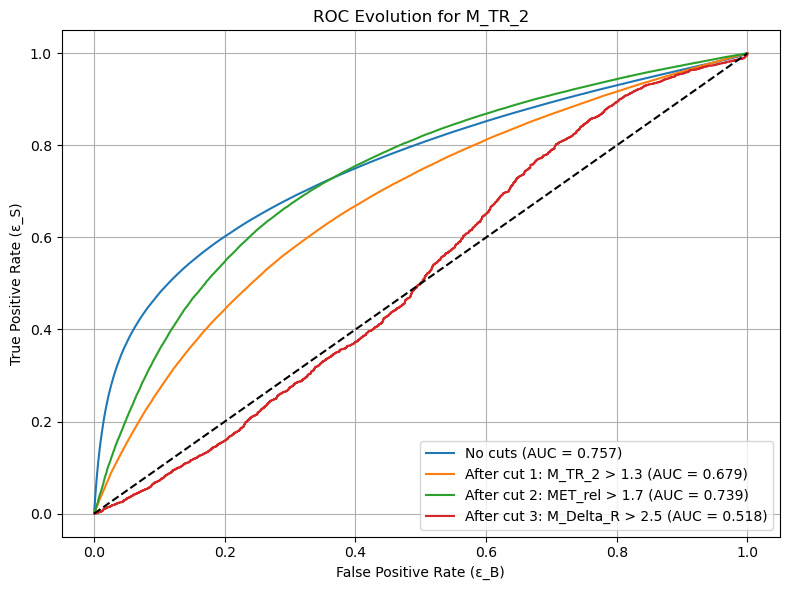

In [14]:
### Exercise 7.3

def compare_roc_after_each_cut(df, feature_to_plot, cuts, signal_label="signal"):
    
    from sklearn.metrics import roc_curve, auc
    import matplotlib.pyplot as plt

    plt.figure(figsize=(8, 6))
    current_df = df.copy()
    
    ### Baseline ROC (meaning no cuts)
    y_true = current_df[signal_label]
    y_scores = current_df[feature_to_plot]
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    base_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"No cuts (AUC = {base_auc:.3f})")
    
    ### Applying cuts one by one
    for i, (cut_feature, op, x_c) in enumerate(cuts):
        if op == ">":
            current_df = current_df[current_df[cut_feature] > x_c]
        elif op == "<":
            current_df = current_df[current_df[cut_feature] < x_c]
        elif op == "|x - mu| >":
            mu = current_df[cut_feature].mean()
            current_df = current_df[np.abs(current_df[cut_feature] - mu) > x_c]
        elif op == "|x - mu| <":
            mu = current_df[cut_feature].mean()
            current_df = current_df[np.abs(current_df[cut_feature] - mu) < x_c]
        else:
            raise ValueError(f"Unknown cut type {op}")
        
        y_true = current_df[signal_label]
        y_scores = current_df[feature_to_plot]
        if len(np.unique(y_true)) < 2:
            continue  
            
        ### Computing ROC and AUC after cut
        fpr, tpr, _ = roc_curve(y_true, y_scores)
        step_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"After cut {i+1}: {cut_feature} {op} {x_c} (AUC = {step_auc:.3f})")


    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f"ROC Evolution for {feature_to_plot}")
    plt.xlabel("False Positive Rate (ε_B)")
    plt.ylabel("True Positive Rate (ε_S)")
    plt.grid(True)
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.show()
    
cuts = [("M_TR_2", ">", 1.3),
        ("MET_rel", ">", 1.7),
        ("M_Delta_R", ">", 2.5)]

compare_roc_after_each_cut(df, feature_to_plot="M_TR_2", cuts=cuts)

Cut Order 1: M_TR_2 → MET_rel → M_Delta_R


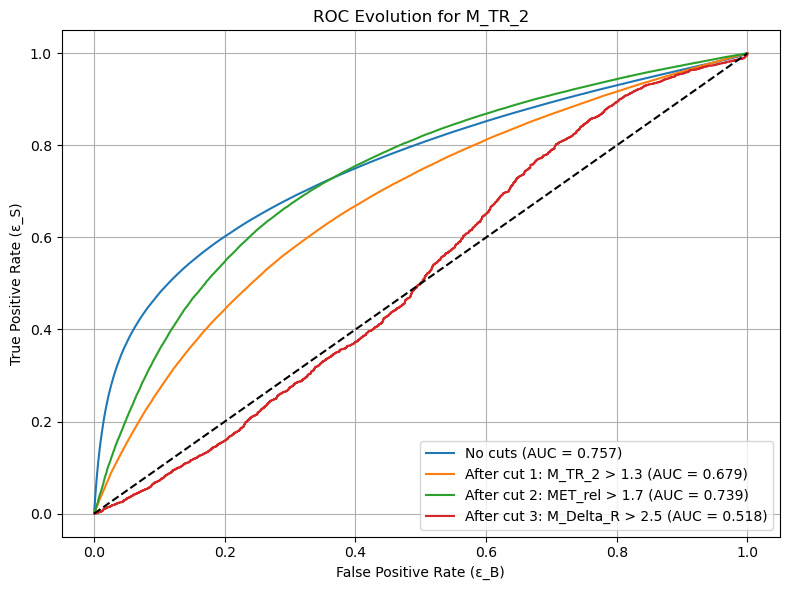

Cut Order 2: M_Delta_R → MET_rel → M_TR_2


In [15]:
### Exercise 7.4

cut_order_1 = [("M_TR_2", ">", 1.3),
               ("MET_rel", ">", 1.7),
               ("M_Delta_R", ">", 2.5),]

cut_order_2 = [("M_Delta_R", ">", 2.5),
               ("MET_rel", ">", 1.7),
               ("M_TR_2", ">", 1.3),]

print("Cut Order 1: M_TR_2 → MET_rel → M_Delta_R")
compare_roc_after_each_cut(df, feature_to_plot="M_TR_2", cuts=cut_order_1)

print("Cut Order 2: M_Delta_R → MET_rel → M_TR_2")
compare_roc_after_each_cut(df, feature_to_plot="M_TR_2", cuts=cut_order_2)


## Exercise 8: Linear Discriminant

### Exercise 8.1

Using numpy, compute the between-class $\bf{S}_B$ and within-class $\bf{S}_W$ covariance matrices defined as:

$$
\bf{S}_B = (\bf{m_2}-\bf{m_1})(\bf{m_2}-\bf{m_1})^T \\
$$
$$
\bf{S}_W = \sum_{i=1,2} \sum_{n=1}^{l_i} (\bf{x}_n^i - \bf{m}_i) (\bf{x}_n^i - \bf{m}_i)^T
$$

where $\bf{m_i}$ are the vectors containing the means for category 1 and 2, here defined as signal and background. Here $\bf{x}_n^i$ is the vector containing the observables for the $n$th example event in category $i$.

### Exercise 8.2

Compute the linear coefficients $\bf{w} = \bf{S_W}^{-1}(\bf{m_2}-\bf{m_1})$. Compare the histogram of the distribution of $F_n^i=\bf{w}^T\bf{x}_n^i$ for the two categories.

### Exercise 8.3

Draw the ROC curve for $F_n$. 

### Exercise 8.4

What is the maximal significance you can obtain in the scenarios in exercise 5? 

In [16]:
### Exercise 8.1

features_sig = df[df['signal'] == 1][FeatureNames].values
features_bkg = df[df['signal'] == 0][FeatureNames].values

### Calculating the mean for each class
mean_sig = np.mean(features_sig, axis=0)
mean_bkg = np.mean(features_bkg, axis=0)

### Converting to column format
mean_sig_vec = mean_sig[:, np.newaxis]
mean_bkg_vec = mean_bkg[:, np.newaxis]

### Between-class covariance matrix
S_B = (mean_bkg_vec - mean_sig_vec) @ (mean_bkg_vec - mean_sig_vec).T

### Within-class covariance matrix
S_W = np.zeros((len(FeatureNames), len(FeatureNames)))

### Signal accumulation
for row in features_sig:
    delta = (row - mean_sig).reshape(-1, 1)
    S_W += delta @ delta.T

### Background accumulation
for row in features_bkg:
    delta = (row - mean_bkg).reshape(-1, 1)
    S_W += delta @ delta.T

print("Between-class scatter S_B:")
print(S_B)

print("\nWithin-class scatter S_W:")
print(S_W)

Between-class scatter S_B:
[[0.02401274 0.05214425 0.07685812 0.00442957 0.07829558 0.01639334
  0.01646802 0.02122624 0.04987486 0.05296553]
 [0.05214425 0.11323253 0.1668993  0.00961892 0.17002079 0.03559855
  0.03576071 0.04609331 0.10830449 0.11501596]
 [0.07685812 0.1668993  0.24600152 0.01417783 0.25060246 0.05247055
  0.05270956 0.06793932 0.1596356  0.16952798]
 [0.00442957 0.00961892 0.01417783 0.00081711 0.014443   0.00302404
  0.00303782 0.00391555 0.00920029 0.00977042]
 [0.07829558 0.17002079 0.25060246 0.014443   0.25528945 0.0534519
  0.05369538 0.06920998 0.16262125 0.17269865]
 [0.01639334 0.03559855 0.05247055 0.00302404 0.0534519  0.01119163
  0.01124261 0.01449102 0.03404925 0.03615923]
 [0.01646802 0.03576071 0.05270956 0.00303782 0.05369538 0.01124261
  0.01129382 0.01455703 0.03420435 0.03632394]
 [0.02122624 0.04609331 0.06793932 0.00391555 0.06920998 0.01449102
  0.01455703 0.0187631  0.04408726 0.04681929]
 [0.04987486 0.10830449 0.1596356  0.00920029 0.162621

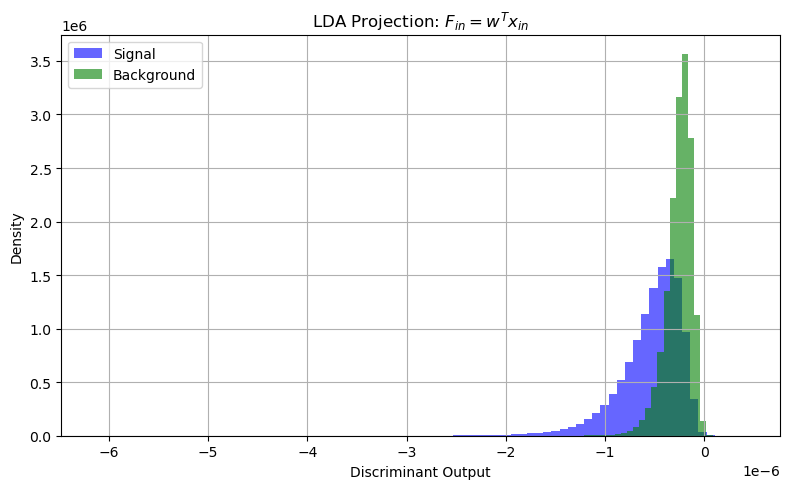

In [18]:
### Exercise 8.2

X_sig = df[df['signal'] == 1][FeatureNames].values
X_bkg = df[df['signal'] == 0][FeatureNames].values


mean_sig = np.mean(X_sig, axis=0)
mean_bkg = np.mean(X_bkg, axis=0)

### Computing Within-class scatter
S_W = np.zeros((len(FeatureNames), len(FeatureNames)))
for x in X_sig:
    d = (x - mean_sig).reshape(-1, 1)
    S_W += d @ d.T
for x in X_bkg:
    d = (x - mean_bkg).reshape(-1, 1)
    S_W += d @ d.T

### Computing  w = S_W^{-1} (mean_bkg - mean_sig)
mean_diff = (mean_bkg - mean_sig).reshape(-1, 1)
w = np.linalg.inv(S_W) @ mean_diff  # shape: (n_features, 1)

F_sig = X_sig @ w
F_bkg = X_bkg @ w

plt.figure(figsize=(8, 5))
plt.hist(F_sig, bins=80, alpha=0.6, label="Signal", color='blue', density=True)
plt.hist(F_bkg, bins=80, alpha=0.6, label="Background", color='green', density=True)
plt.title("LDA Projection: $F_{in} = w^T x_{in}$")
plt.xlabel("Discriminant Output")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

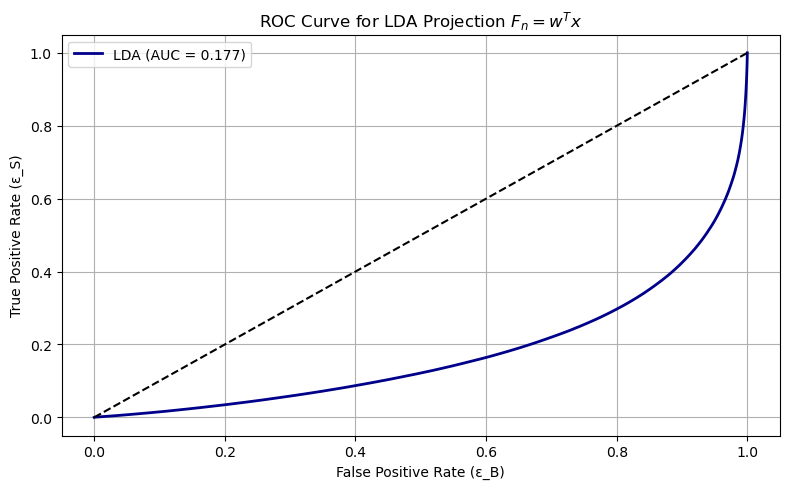

In [19]:
### Exercise 8.3

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

### Combinning all feature into one array
X_all = df[FeatureNames].values
y_true = df['signal'].values

### Computing projections
F_n = X_all @ w 
F_n = F_n.ravel() 

### ROC curve and AUC
fpr, tpr, _ = roc_curve(y_true, F_n)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f"LDA (AUC = {roc_auc:.3f})", color="darkblue", linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve for LDA Projection $F_n = w^T x$")
plt.xlabel("False Positive Rate (ε_B)")
plt.ylabel("True Positive Rate (ε_S)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [22]:
### Exercise 8.4

scenarios = [(10, 100),
             (100, 1000),
             (1000, 10000),
             (10000, 100000)]

### Getting TPR, FPR, thresholds
fpr, tpr, thresholds = roc_curve(y_true, F_n)

### Calculating significance for each threshold and scenario
for N_S, N_B in scenarios:
    best_sigma = 0          ### Stores highest significance value
    best_threshold = None   ### Stores threhold at max significance ocurs

    for tpr_i, fpr_i, thresh in zip(tpr, fpr, thresholds):
        Np_S = tpr_i * N_S
        Np_B = fpr_i * N_B
        sigma = Np_S / np.sqrt(Np_S + Np_B) if (Np_S + Np_B) > 0 else 0       ### Computing significance

        if sigma > best_sigma:
            best_sigma = sigma
            best_threshold = thresh

    print(f"Scenario N_S={N_S}, N_B={N_B}:")
    print(f"Max significance σ'_S = {best_sigma:.3f}")
    print(f"Optimal threshold on F_n = {best_threshold:.3f}\n")

Scenario N_S=10, N_B=100:
Max significance σ'_S = 0.953
Optimal threshold on F_n = -0.000

Scenario N_S=100, N_B=1000:
Max significance σ'_S = 3.015
Optimal threshold on F_n = -0.000

Scenario N_S=1000, N_B=10000:
Max significance σ'_S = 9.535
Optimal threshold on F_n = -0.000

Scenario N_S=10000, N_B=100000:
Max significance σ'_S = 30.151
Optimal threshold on F_n = -0.000

